In [2]:
import sys
sys.path.append("../../")
DATA_PATH = "../../data/"
SAVE_PATH = "../../plots"

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import py_common.utility as utility
from py_common.units import *
from py_common.scattering_dependence import *
from py_common.bounds_dependence import *
from py_common.wave_function import *
from matplotlib.collections import LineCollection
import itertools

plt.rcParams.update({'font.size': 18})

BINS = [-0.246, -1.660, -5.280]

reference_singlet = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet.dat")
reference_singlet_scaled_1 = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_singlet_scaled_1.dat")

reference_triplet = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet.dat")
reference_triplet_scaled_1 = np.loadtxt(f"{DATA_PATH}/srf_rb_bounds_n_175_triplet_scaled_1.dat")

In [3]:
def bounds_loss(bounds, bounds_true):
    chi = 0
    for i, b in enumerate(bounds_true):
        if i >= len(bounds):
            chi += 1
        else:
            chi += (np.log2(bounds[i] / b))**2
    chi /= i # type: ignore
    
    return chi

def bounds_losses(bounds, bounds_true):
    fields = np.unique(bounds.data[:, 0])

    losses = []
    for bounds_single in bounds.fields():
        losses.append(bounds_loss(bounds_single[:, 1], bounds_true))

    return np.array([np.array(fields), np.array(losses)])

# N_max = 175, potential scaling

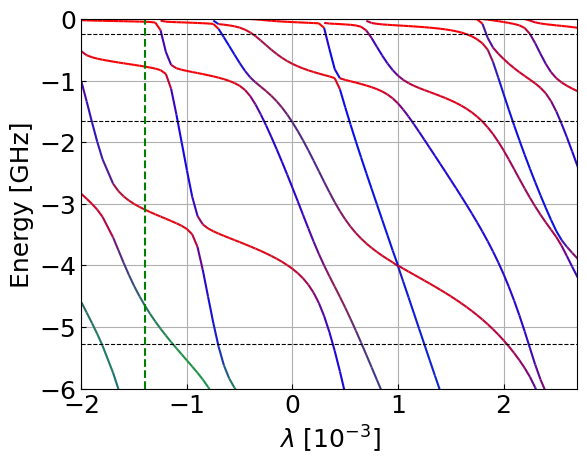

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/bound_triplet_n_175_wave_function.dat")

def scaled(a):
	return (a - 1) * 1000

fig, ax = utility.plot()

for state in bounds_single.states():
	points = np.column_stack([scaled(state[:, 0]), state[:, 1]])
	segments = np.stack([points[:-1], points[1:]], axis=1)
	colors = np.column_stack([state[:, 2], state[:, 3], np.sum(state[:, 4:], axis = 1)])
	
	lc = LineCollection(segments, colors=colors[:-1]) # type: ignore
	
	ax.add_collection(lc)
	# ax.scatter(state[:, 0], state[:, 1], color = colors, s=5)

for value in BINS:
	ax.axhline(value, linestyle="--", color="black", linewidth=0.8)
	
ax.axvline(scaled(0.9986), linestyle="--", color="green")

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(r"$\lambda$ [$10^{-3}$]")
ax.set_ylim(-6, 0)
ax.set_xlim(-2, 2.7);

# fig.savefig(f"{SAVE_PATH}/bound_triplet_n_175_scaling.pdf", bbox_inches = "tight")

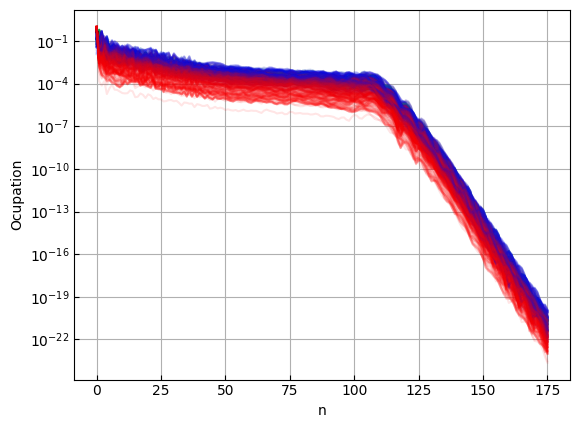

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/bound_triplet_n_175_wave_function.dat")

fig, ax = utility.plot()

n = np.arange(176)
for state in bounds_single.states():
    occupation = state[:, 2:]
    colors = np.column_stack([state[:, 2], state[:, 3], np.sum(state[:, 4:], axis = 1)])
    
    for i in range(occupation.shape[0]):
        ax.plot(n, occupation[i, :], color = colors[i, :], alpha = 0.1)

ax.set_ylabel(f"Ocupation")
ax.set_xlabel("n")
ax.set_yscale("log")

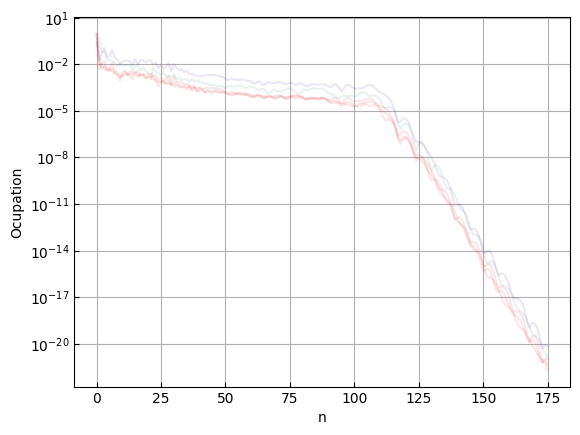

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/bound_triplet_n_175_wave_function.dat")

fig, ax = utility.plot()

n = np.arange(176)

states = [k for k in bounds_single.fields()]

state = states[14]

occupation = state[:, 2:]
colors = np.column_stack([state[:, 2], state[:, 3], np.sum(state[:, 4:], axis = 1)])

for i in range(occupation.shape[0]):
    ax.plot(n, occupation[i, :], color = colors[i, :])

ax.set_ylabel(f"Ocupation")
ax.set_xlabel("n")
ax.set_yscale("log")

0.99875


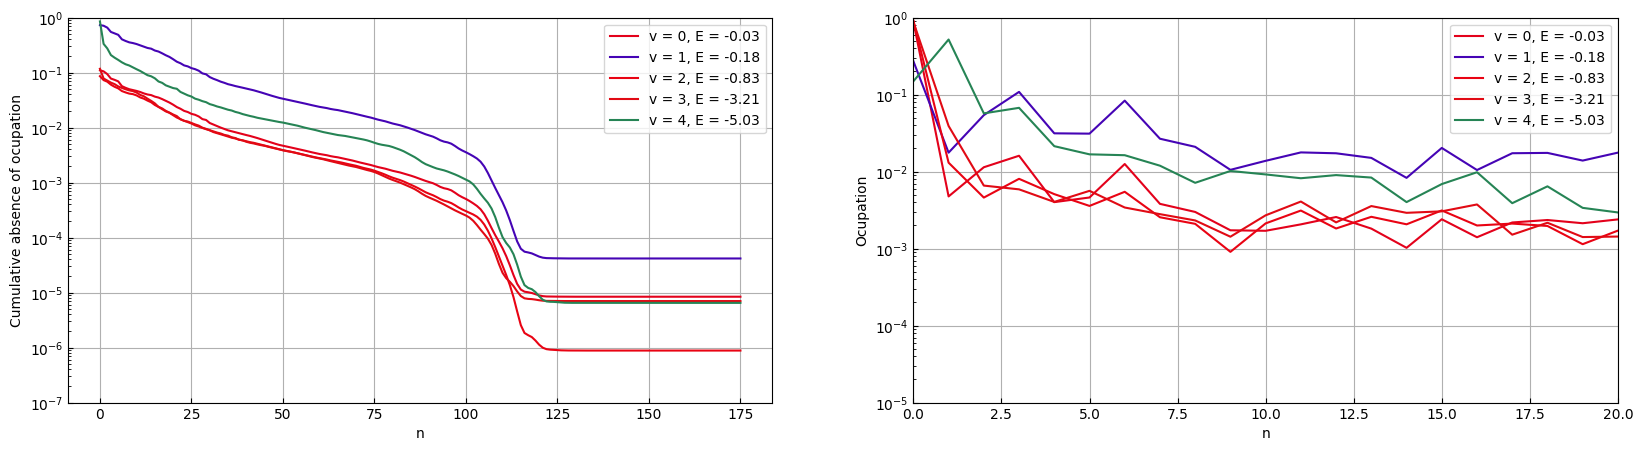

In [ ]:
bounds_single = BoundsDependence(f"{DATA_PATH}/bound_triplet_n_175_wave_function.dat")

fig, axes = utility.plot_many(1, 2, shape = (20, 5))

n = np.arange(176)

states = [k for k in bounds_single.fields()]

state = states[14]

occupation = state[:, 2:]
colors = np.column_stack([state[:, 2], state[:, 3], np.sum(state[:, 4:], axis = 1)])

for i in range(occupation.shape[0]):
    axes[0].plot(n, np.clip(1 - np.cumsum(occupation[i, :]), 0, 1), color = colors[i, :], label = f"v = {i}, E = {state[i, 1]:.2f}")

axes[0].set_ylabel(f"Cumulative absence of ocupation")
axes[0].set_xlabel("n")
axes[0].set_yscale("log")
axes[0].legend()
axes[0].set_ylim(1e-7, 1);

for i in range(occupation.shape[0]):
    axes[1].plot(n, occupation[i, :], color = colors[i, :], label = f"v = {i}, E = {state[i, 1]:.2f}")

axes[1].set_ylabel(f"Ocupation")
axes[1].set_xlabel("n")
axes[1].set_yscale("log")
axes[1].legend()
axes[1].set_ylim(1e-5, 1)

print(state[0, 0])

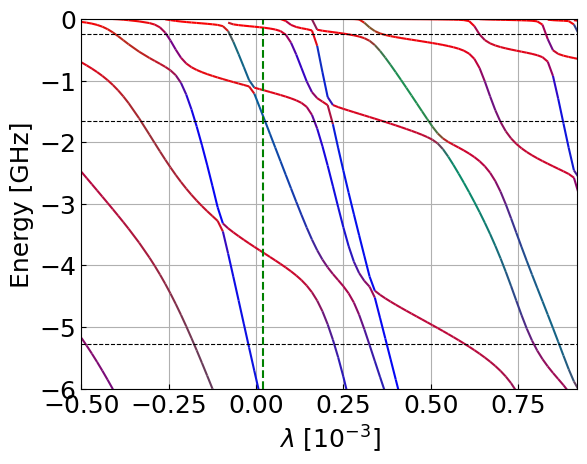

In [7]:
bounds_single = BoundsDependence(f"{DATA_PATH}/bound_singlet_n_175_wave_function.dat")

fig, ax = utility.plot()

def scaled(a):
	return (a - 1) * 1000

for state in bounds_single.states():
	points = np.column_stack([scaled(state[:, 0]), state[:, 1]])
	segments = np.stack([points[:-1], points[1:]], axis=1)
	colors = np.column_stack([state[:, 2], state[:, 3], np.sum(state[:, 4:], axis = 1)])
	
	lc = LineCollection(segments, colors=colors[:-1]) # type: ignore
	
	ax.add_collection(lc)
	# ax.scatter(state[:, 0], state[:, 1], color = colors, s=5)

for value in BINS:
	ax.axhline(value, linestyle="--", color="black", linewidth=0.8)

ax.axvline(scaled(1.00002), linestyle="--", color="green")

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(r"$\lambda$ [$10^{-3}$]")
ax.set_ylim(-6, 0);
ax.set_xlim(-0.5, 0.92);

# fig.savefig(f"{SAVE_PATH}/bound_singlet_n_175_scaling.pdf", bbox_inches = "tight")

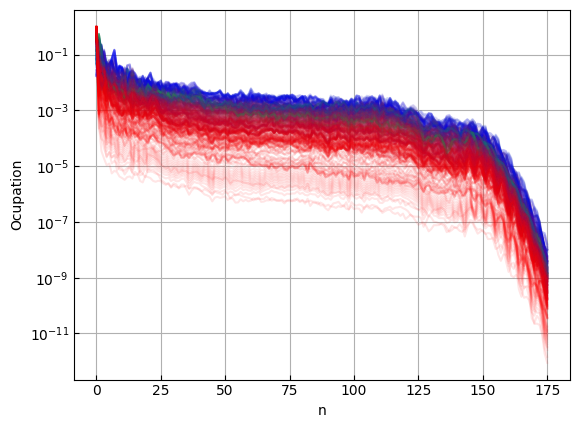

In [6]:
bounds_single = BoundsDependence(f"{DATA_PATH}/bound_singlet_n_175_wave_function.dat")

fig, ax = utility.plot()

n = np.arange(176)
for state in bounds_single.states():
    occupation = state[:, 2:]
    colors = np.column_stack([state[:, 2], state[:, 3], np.sum(state[:, 4:], axis = 1)])
    
    for i in range(occupation.shape[0]):
        ax.plot(n, occupation[i, :], color = colors[i, :], alpha = 0.1)

ax.set_ylabel(f"Ocupation")
ax.set_xlabel("n")
ax.set_yscale("log")

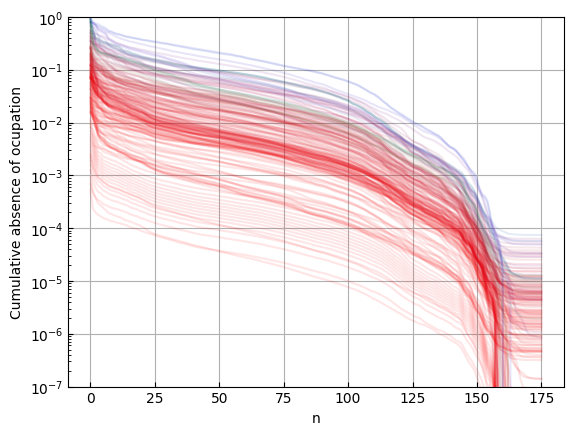

In [8]:
bounds_single = BoundsDependence(f"{DATA_PATH}/bound_singlet_n_175_wave_function.dat")

fig, ax = utility.plot()

n = np.arange(176)

for state in bounds_single.states():
    occupation = state[:, 2:]
    colors = np.column_stack([state[:, 2], state[:, 3], np.sum(state[:, 4:], axis = 1)])
    
    for i in range(occupation.shape[0]):
        if state[i, 1] > -1:
            ax.plot(n, np.clip(1 - np.cumsum(occupation[i, :]), 0, 1), color = colors[i, :], alpha = 0.1)

ax.set_ylabel(f"Cumulative absence of ocupation")
ax.set_xlabel("n")
ax.set_yscale("log")
ax.set_ylim(1e-7, 1);

In [8]:
max_coeff = 5
parsed_singlet = parse_wavefunction_file(f'{DATA_PATH}/wave_function_singlet_175.output', 176, max_coeff = max_coeff)
parsed_singlet_scaled = parse_wavefunction_file(f'{DATA_PATH}/wave_function_singlet_175_scaled.output', 176, max_coeff = max_coeff)
parsed_triplet = parse_wavefunction_file(f'{DATA_PATH}/wave_function_triplet_175.output', 176, max_coeff = max_coeff)
parsed_triplet_scaled = parse_wavefunction_file(f'{DATA_PATH}/wave_function_triplet_175_scaled.output', 176, max_coeff = max_coeff)

colors = ["red", "green", "blue", "purple", "navy", "black"]

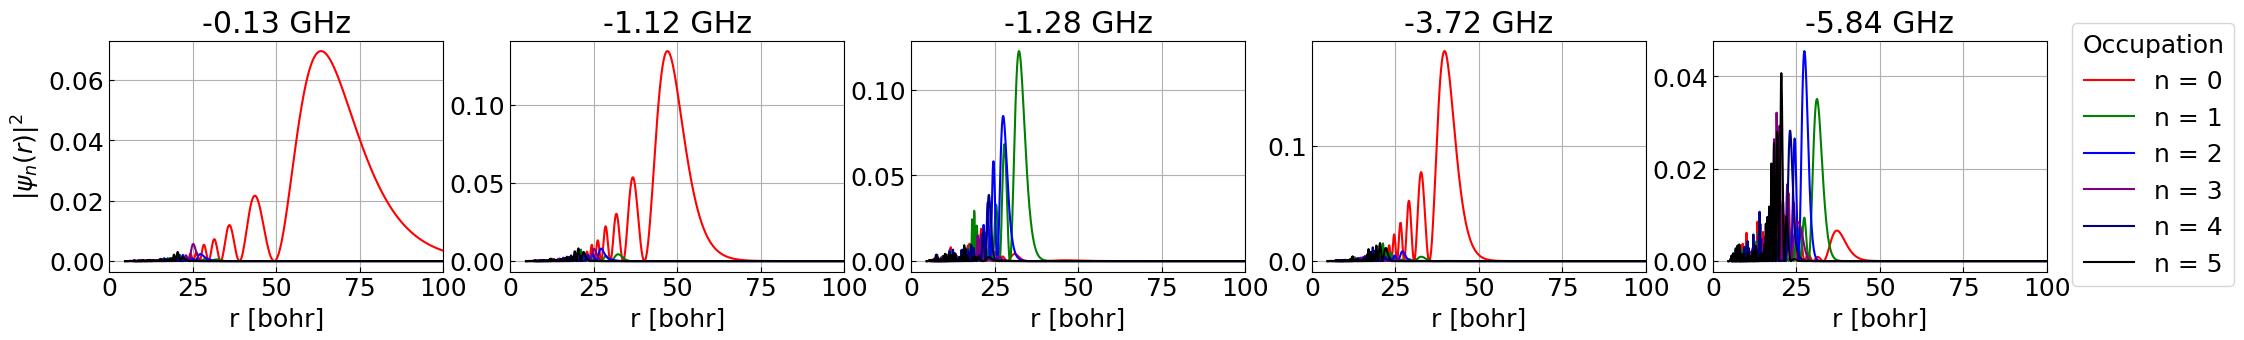

In [ ]:
take = 5

fig, axes = utility.plot_many(1, take, shape = (5 * take, 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in itertools.islice(enumerate(reversed(parsed_singlet.items())), take):
    for j in range(parsed["coeffs"].shape[1]):
        axes[i].plot(parsed["r"] * ANGS, parsed["coeffs"][:, j] **2, color = colors[j])
        
    axes[i].set_xlabel("r [bohr]")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 100)

fig.legend([f"n = {j}" for j in range(max_coeff + 1)],
           loc='center right', bbox_to_anchor=(0.98, 0.5),
           title='Occupation');

# fig.savefig(f"{SAVE_PATH}/wave_function_singlet_n_175.pdf", bbox_inches = "tight")

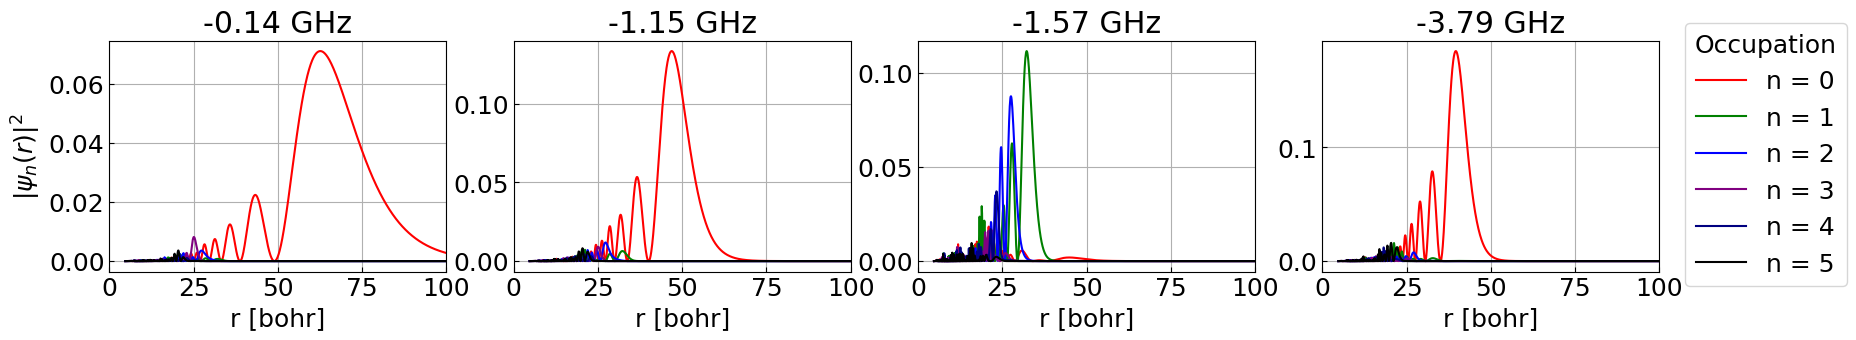

In [15]:
take = 4

fig, axes = utility.plot_many(1, take, shape = (5 * take, 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in itertools.islice(enumerate(reversed(parsed_singlet_scaled.items())), take):
    for j in range(parsed["coeffs"].shape[1]):
        axes[i].plot(parsed["r"] * ANGS, parsed["coeffs"][:, j] **2, color = colors[j])
    axes[i].set_xlabel("r [bohr]")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 100)

fig.legend([f"n = {j}" for j in range(max_coeff + 1)],
           loc='center right', bbox_to_anchor=(1, 0.5),
           title='Occupation');
    
# fig.savefig(f"{SAVE_PATH}/wave_function_singlet_n_175_scaled.pdf", bbox_inches = "tight")

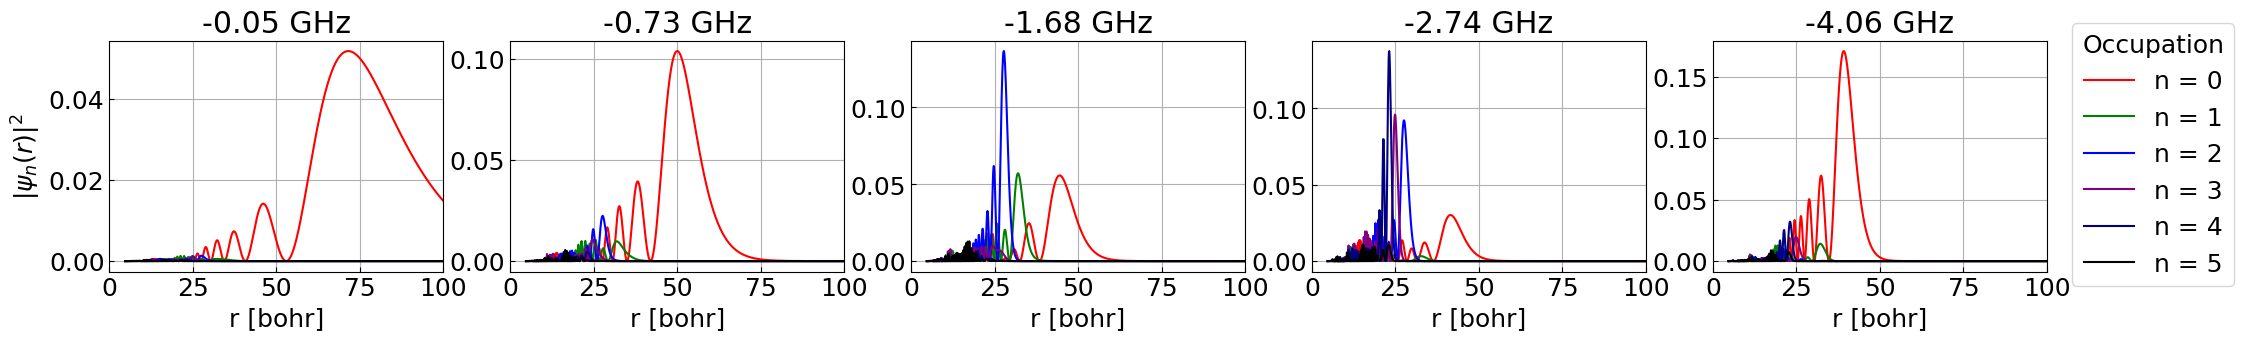

In [62]:
take = 5

fig, axes = utility.plot_many(1, take, shape = (5 * take, 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in itertools.islice(enumerate(reversed(parsed_triplet.items())), take):
    for j in range(parsed["coeffs"].shape[1]):
        axes[i].plot(parsed["r"] * ANGS, parsed["coeffs"][:, j] **2, color = colors[j])
    axes[i].set_xlabel("r [bohr]")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 100)

fig.legend([f"n = {j}" for j in range(max_coeff + 1)],
           loc='center right', bbox_to_anchor=(0.98, 0.5),
           title='Occupation');
    
# fig.savefig(f"{SAVE_PATH}/wave_function_triplet_n_175.pdf", bbox_inches = "tight")

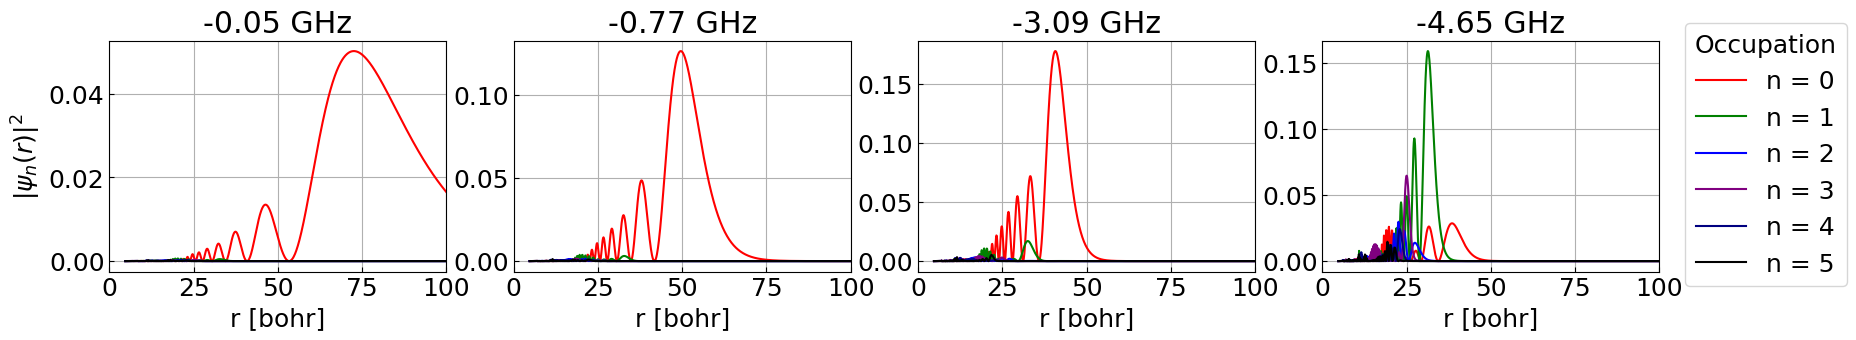

In [ ]:
take = 4

fig, axes = utility.plot_many(1, take, shape = (5 * take, 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in itertools.islice(enumerate(reversed(parsed_triplet_scaled.items())), take):
    for j in range(parsed["coeffs"].shape[1]):
        axes[i].plot(parsed["r"] * ANGS, parsed["coeffs"][:, j] **2, color = colors[j])
    axes[i].set_xlabel("r [bohr]")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 100)

fig.legend([f"n = {j}" for j in range(max_coeff + 1)],
           loc='center right', bbox_to_anchor=(1, 0.5),
           title='Occupation');
    
# fig.savefig(f"{SAVE_PATH}/wave_function_triplet_n_175_scaled.pdf", bbox_inches = "tight")

In [27]:
max_coeff = 5
parsed_singlet = parse_wavefunction_file(f'{DATA_PATH}/wave_function_singlet_175_adiabat.output', 176, max_coeff = max_coeff)
parsed_singlet_scaled = parse_wavefunction_file(f'{DATA_PATH}/wave_function_singlet_175_scaled_adiabat.output', 176, max_coeff = max_coeff)
parsed_triplet = parse_wavefunction_file(f'{DATA_PATH}/wave_function_triplet_175_adiabat.output', 176, max_coeff = max_coeff)
parsed_triplet_scaled = parse_wavefunction_file(f'{DATA_PATH}/wave_function_triplet_175_scaled_adiabat.output', 176, max_coeff = max_coeff)

colors = ["red", "green", "blue", "purple", "navy", "black"]

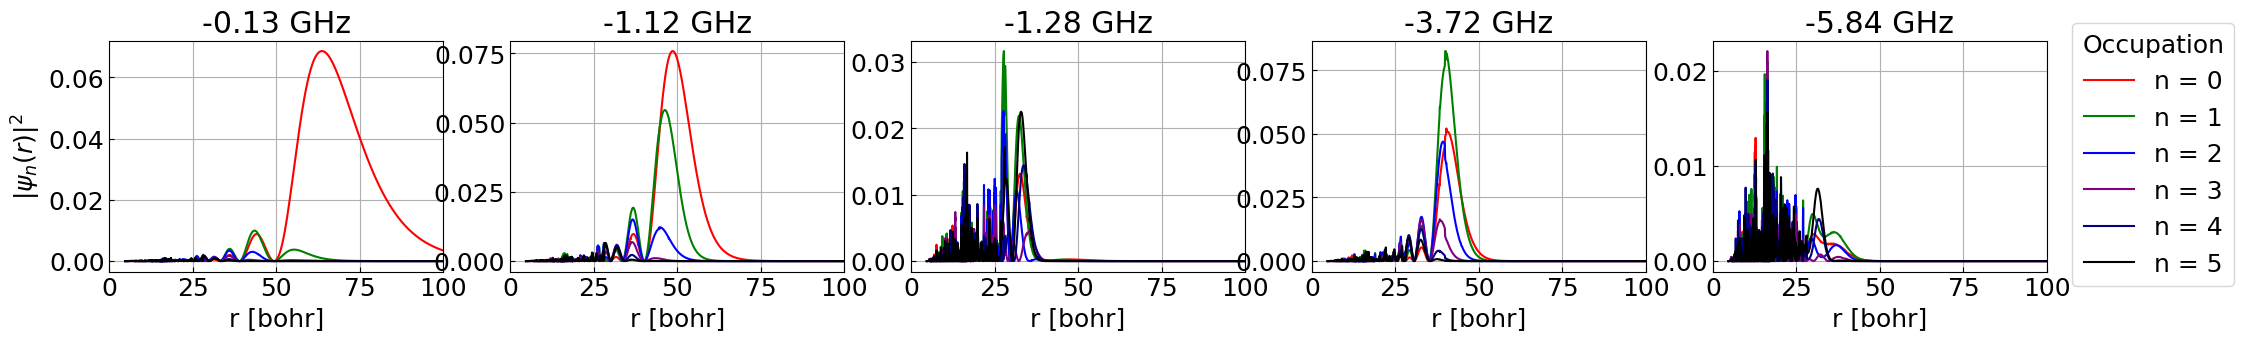

In [18]:
take = 5

fig, axes = utility.plot_many(1, take, shape = (5 * take, 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in itertools.islice(enumerate(reversed(parsed_singlet.items())), take):
    for j in range(parsed["coeffs"].shape[1]):
        axes[i].plot(parsed["r"] * ANGS, parsed["coeffs"][:, j] **2, color = colors[j])
        
    axes[i].set_xlabel("r [bohr]")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 100)

fig.legend([f"n = {j}" for j in range(max_coeff + 1)],
           loc='center right', bbox_to_anchor=(0.98, 0.5),
           title='Occupation');

# fig.savefig(f"{SAVE_PATH}/wave_function_singlet_n_175.pdf", bbox_inches = "tight")

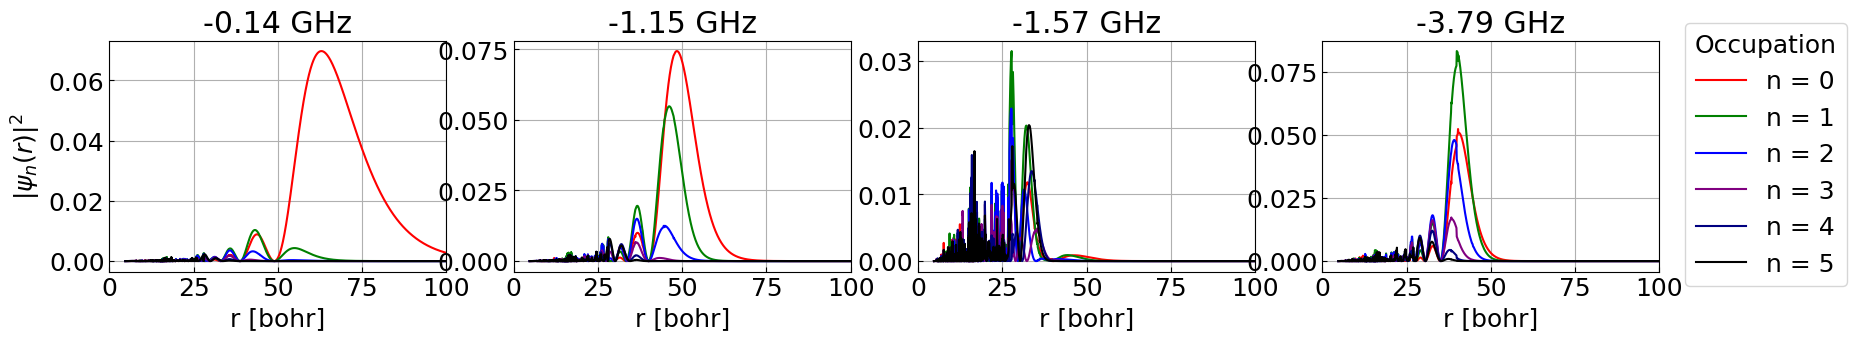

In [22]:
take = 4

fig, axes = utility.plot_many(1, take, shape = (5 * take, 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in itertools.islice(enumerate(reversed(parsed_singlet_scaled.items())), take):
    for j in range(parsed["coeffs"].shape[1]):
        axes[i].plot(parsed["r"] * ANGS, parsed["coeffs"][:, j] **2, color = colors[j])
    axes[i].set_xlabel("r [bohr]")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 100)

fig.legend([f"n = {j}" for j in range(max_coeff + 1)],
           loc='center right', bbox_to_anchor=(1, 0.5),
           title='Occupation');
    
# fig.savefig(f"{SAVE_PATH}/wave_function_singlet_n_175_scaled.pdf", bbox_inches = "tight")

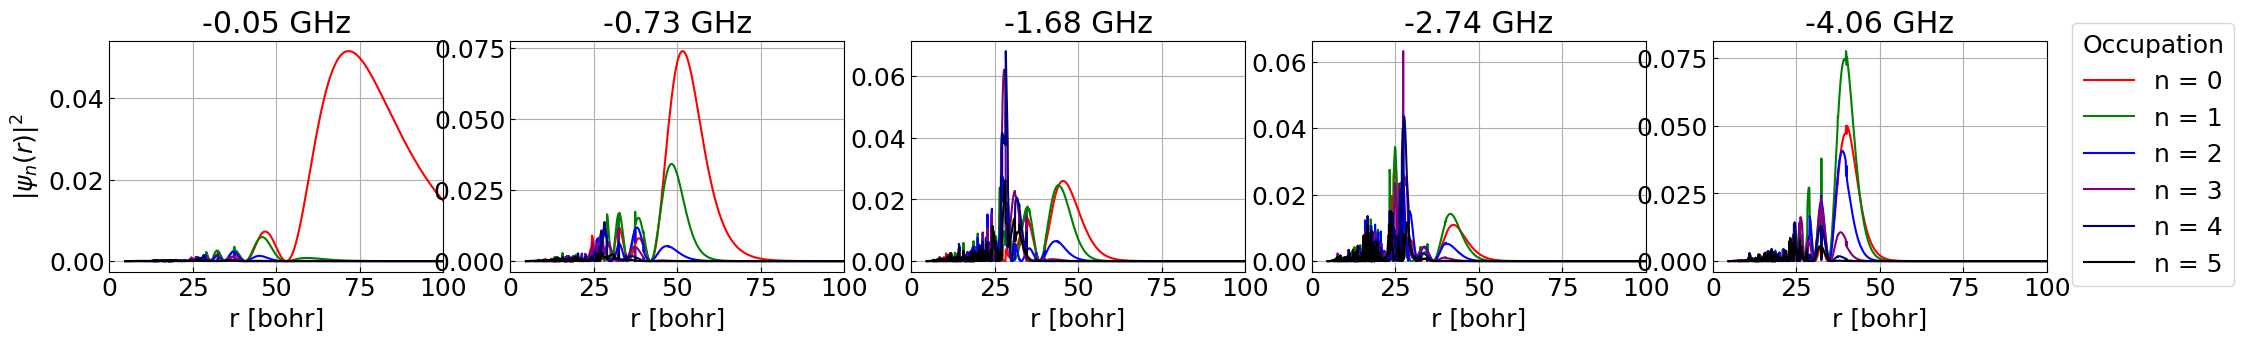

In [28]:
take = 5

fig, axes = utility.plot_many(1, take, shape = (5 * take, 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in itertools.islice(enumerate(reversed(parsed_triplet.items())), take):
    for j in range(parsed["coeffs"].shape[1]):
        axes[i].plot(parsed["r"] * ANGS, parsed["coeffs"][:, j] **2, color = colors[j])
    axes[i].set_xlabel("r [bohr]")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 100)

fig.legend([f"n = {j}" for j in range(max_coeff + 1)],
           loc='center right', bbox_to_anchor=(0.98, 0.5),
           title='Occupation');
    
# fig.savefig(f"{SAVE_PATH}/wave_function_triplet_n_175.pdf", bbox_inches = "tight")

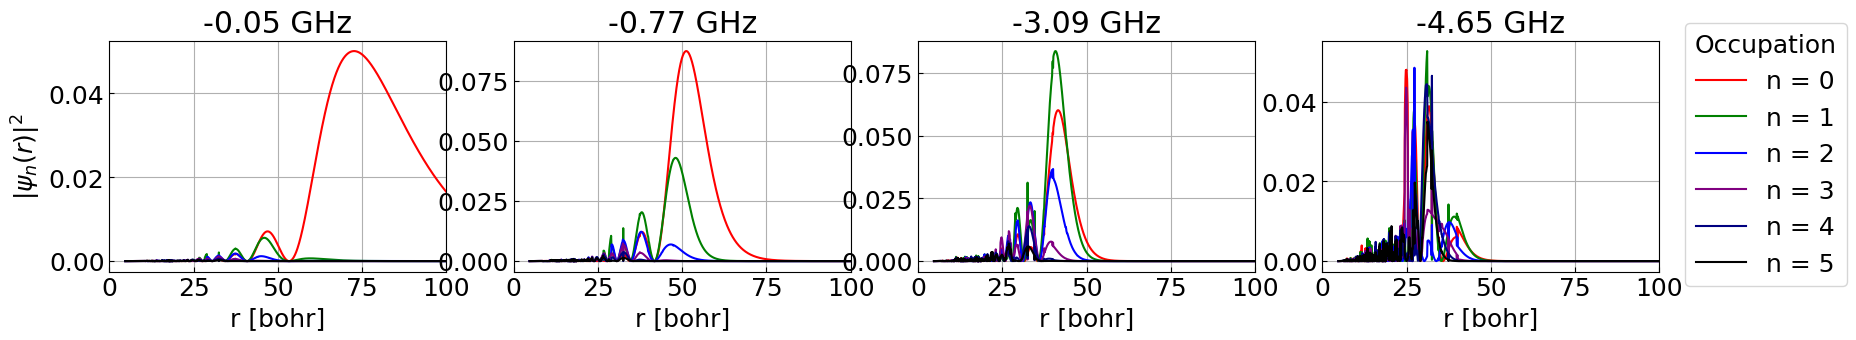

In [24]:
take = 4

fig, axes = utility.plot_many(1, take, shape = (5 * take, 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in itertools.islice(enumerate(reversed(parsed_triplet_scaled.items())), take):
    for j in range(parsed["coeffs"].shape[1]):
        axes[i].plot(parsed["r"] * ANGS, parsed["coeffs"][:, j] **2, color = colors[j])
    axes[i].set_xlabel("r [bohr]")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 100)

fig.legend([f"n = {j}" for j in range(max_coeff + 1)],
           loc='center right', bbox_to_anchor=(1, 0.5),
           title='Occupation');
    
# fig.savefig(f"{SAVE_PATH}/wave_function_triplet_n_175_scaled.pdf", bbox_inches = "tight")

# Bound states hifi

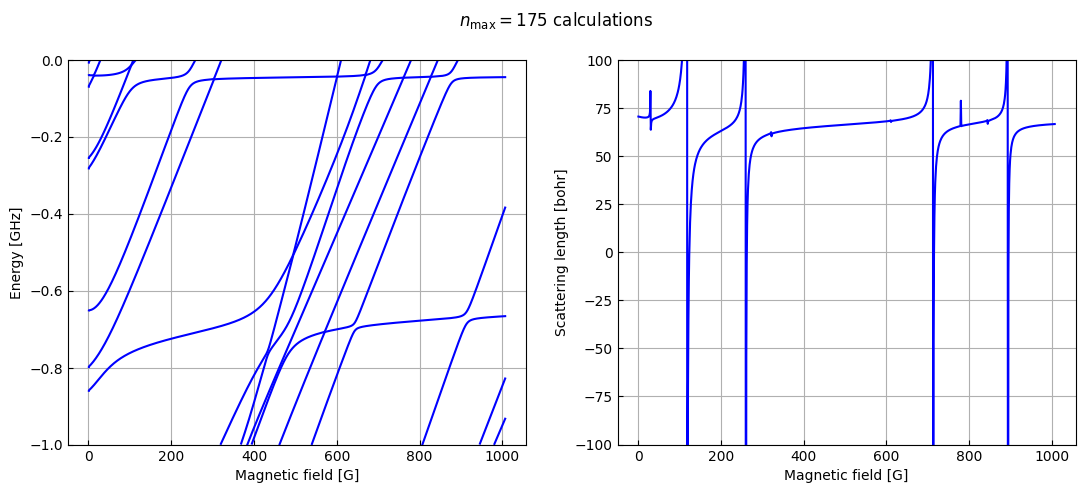

In [3]:
fig, axes = utility.plot_many(1, 2, shape=(13, 5))

bounds_single = BoundsDependence(f"{DATA_PATH}/bound_n_max_175.dat")
for state in bounds_single.states():
	axes[0].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-1, 0);

filename = f"{DATA_PATH}/molscat_n_max_175.dat"
data = np.loadtxt(filename, delimiter="\t", skiprows=1)

axes[1].plot(data[:, 1], data[:, 2] * ANGS, color = "blue")

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-100, 100);

# fig.savefig(f"{SAVE_PATH}/feshbach_n_175.pdf", bbox_inches = "tight")
fig.suptitle(r"$n_\text{max} = 175$ calculations");

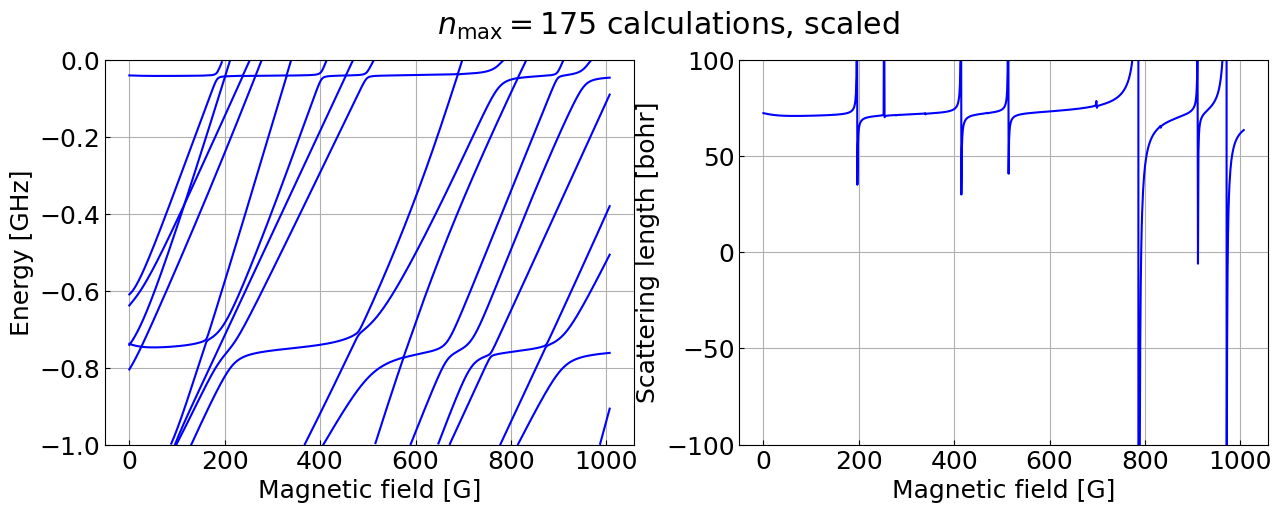

In [ ]:
fig, axes = utility.plot_many(1, 2, shape=(15, 5))

bounds_single = BoundsDependence(f"{DATA_PATH}/bound_n_max_175_scaled_1.dat")
for state in bounds_single.states():
	axes[0].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-1, 0);

filename = f"{DATA_PATH}/molscat_n_max_175_scaled_1.dat"
data = np.loadtxt(filename, delimiter="\t", skiprows=1)

axes[1].plot(data[:-48, 1], data[:-48, 2] * ANGS, color = "blue")

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-100, 100);

# fig.savefig(f"{SAVE_PATH}/feshbach_n_175_scaled.pdf", bbox_inches = "tight")
fig.suptitle(r"$n_\text{max} = 175$ calculations, scaled");

# Bound in rust

# 2d scalings

### helping functions

In [5]:
from typing import Optional
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "browser"
from ipywidgets import interact

In [ ]:
bounds_triplet_2d = BoundsDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_2d_scaling_isotropic_anisotropic_n_max_10.json")
bounds_singlet_2d = BoundsDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_2d_scaling_isotropic_anisotropic_n_max_10.json")

In [6]:
from matplotlib.figure import Figure
from py_common.utility import AxesArray

def plot_2d(bound_dependence: BoundsDependence2D, reference: npt.NDArray[np.float64], axis: int = 1) -> tuple[Figure, AxesArray]:
    fig, axes = utility.plot_many(1, 2, shape=(15, 5))

    bounds_init, scaling_view = bound_dependence.slice(0, axis)
    for state in bounds_init.states():
        axes[0].plot(state[:, 0], state[:, 1], color="blue")

    for b in reference:
        axes[0].axhline(b, color = "red", linestyle="--", linewidth=1)

    for b in BINS:
        axes[0].axhline(b, color = "black", linestyle="--", linewidth=0.5)
        
    fig.suptitle(f"scaling view factor {scaling_view:.4f}")

    def update(scaling_index = 0):
        for art in list(axes[0].lines):
            art.remove()

        bounds_index, scaling_view = bound_dependence.slice(scaling_index, axis)

        for state in bounds_index.states():
            axes[0].plot(state[:, 0], state[:, 1], color="blue")

        for b in reference:
            axes[0].axhline(b, color = "red", linestyle="--", linewidth=1)

        for b in BINS:
            axes[0].axhline(b, color = "black", linestyle="--", linewidth=0.5)

        for art in list(axes[1].lines):
            art.remove()
        chi2 = bounds_losses(bounds_index, reference)
        axes[1].plot(chi2[0, :], chi2[1, :], color = "blue")

        fig.suptitle(f"scaling view factor {scaling_view:.4f}")

        fig.canvas.draw_idle()

    interact(update, scaling_index = (0, bound_dependence.slice_len(axis) - 1))

    return fig, axes

### 2d grid optimization

interactive(children=(IntSlider(value=0, description='scaling_index', max=99), Output()), _dom_classes=('widge…

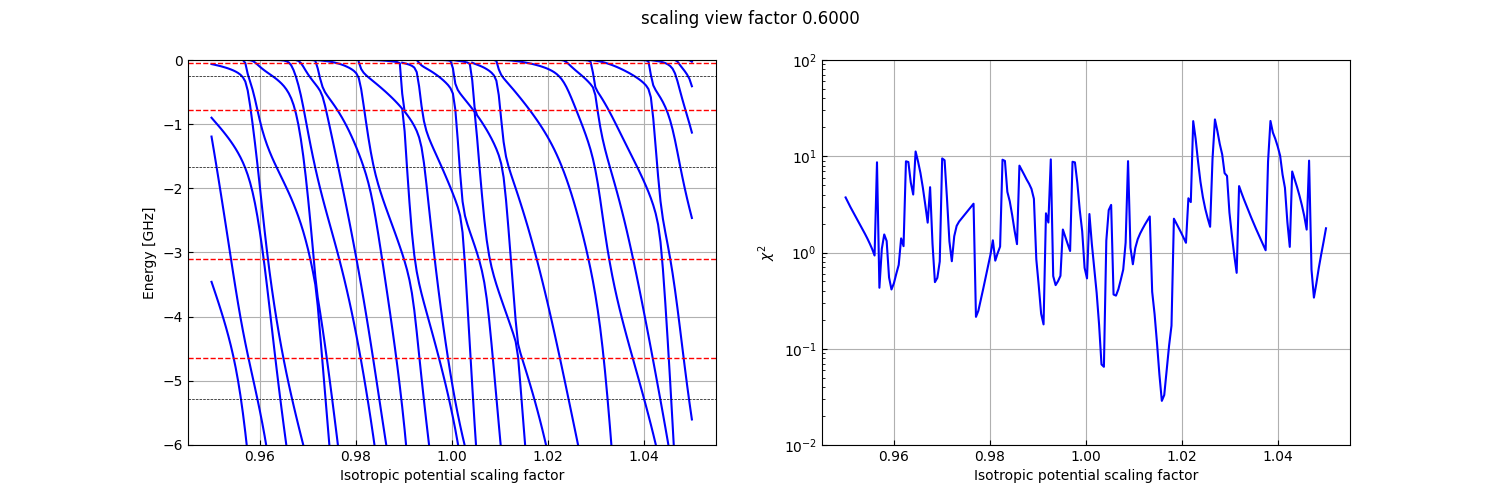

In [8]:
# triplet n = 10 2d scaling
%matplotlib widget

fig, axes = plot_2d(bounds_triplet_2d, reference_triplet_scaled_1)

label = "Isotropic potential scaling factor"

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel(label)
axes[0].set_ylim(-6, 0)

axes[1].set_yscale("log")
axes[1].set_ylim(1e-2, 1e2)
axes[1].set_ylabel(r"$\chi^2$")
axes[1].set_xlabel(label);

interactive(children=(IntSlider(value=0, description='scaling_index', max=99), Output()), _dom_classes=('widge…

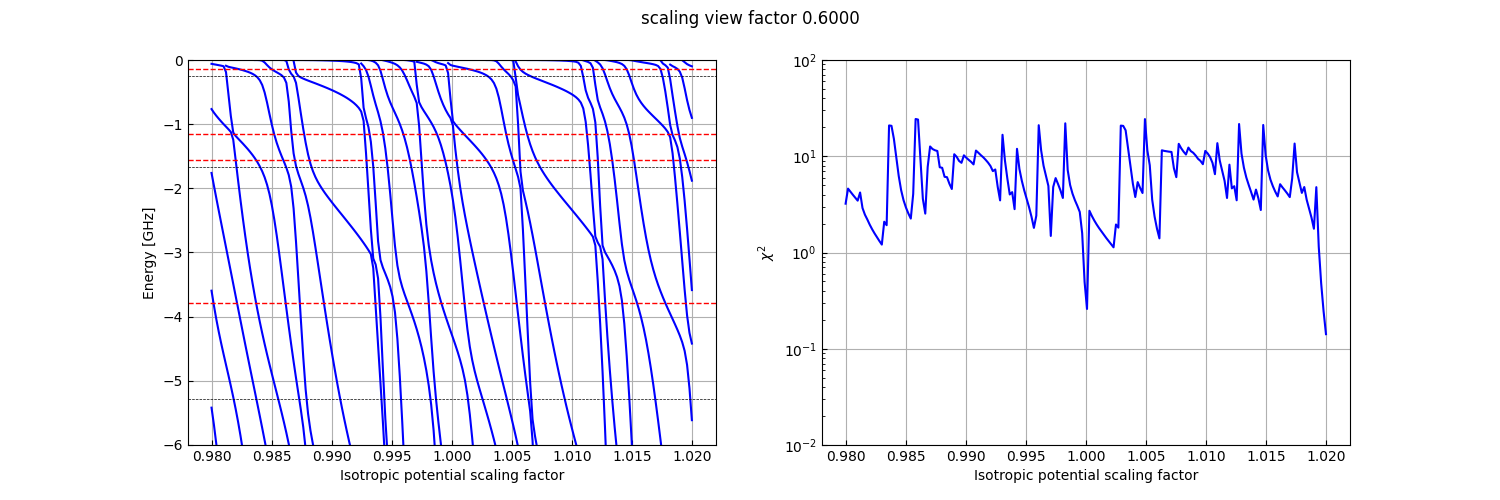

In [255]:
# singlet n = 10 2d scaling
%matplotlib widget

fig, axes = plot_2d(bounds_singlet_2d, reference_singlet_scaled_1)

label = "Isotropic potential scaling factor"

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel(label)
axes[0].set_ylim(-6, 0)

axes[1].set_yscale("log")
axes[1].set_ylim(1e-2, 1e2)
axes[1].set_ylabel(r"$\chi^2$")
axes[1].set_xlabel(label);

### triplet zoom on anisotropic scaling 0.8141 

interactive(children=(IntSlider(value=0, description='scaling_index', max=49), Output()), _dom_classes=('widge…

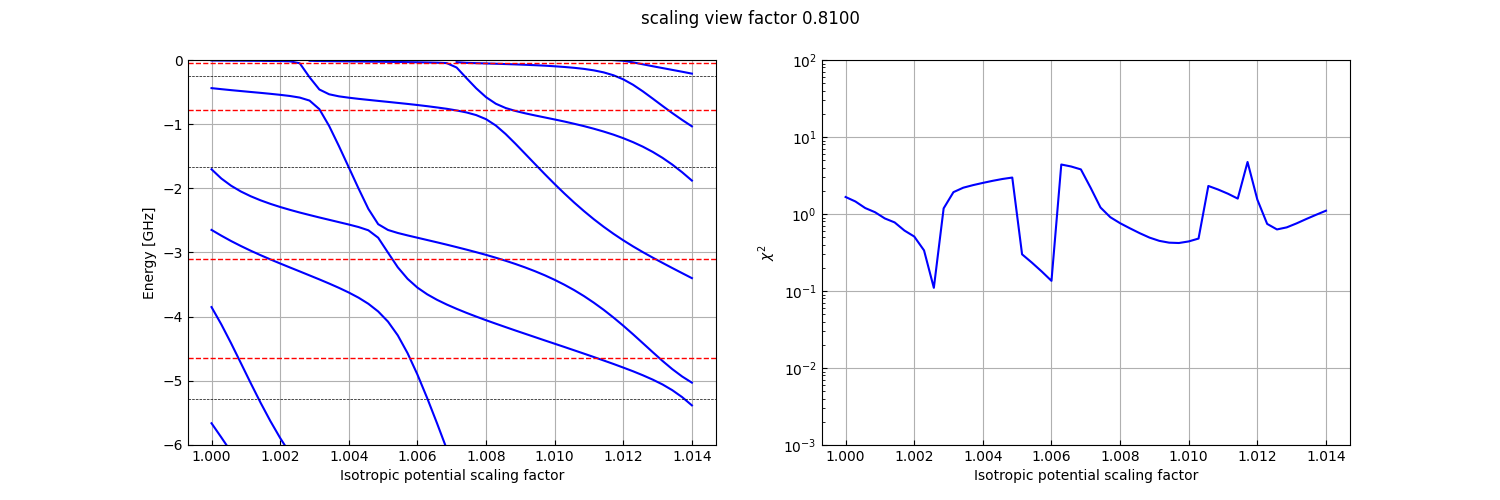

In [16]:
# triplet n = 10 2d scaling zoomed 0.8141
%matplotlib widget

bounds_triplet_2d_zoomed = BoundsDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_2d_scaling_isotropic_anisotropic_n_max_10_zoomed_0.8141.json")

fig, axes = plot_2d(bounds_triplet_2d_zoomed, reference_triplet_scaled_1)

label = "Isotropic potential scaling factor"

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel(label)
axes[0].set_ylim(-6, 0)

axes[1].set_yscale("log")
axes[1].set_ylim(1e-3, 1e2)
axes[1].set_ylabel(r"$\chi^2$")
axes[1].set_xlabel(label);

anisotropic scaling 0.8142857142857143
isotropic scaling 1.0071


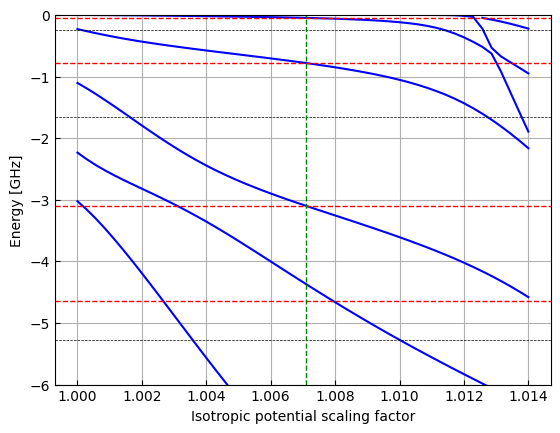

In [82]:
%matplotlib inline

bounds, scaling_aniso = bounds_triplet_2d_zoomed.slice(21)
scaling_iso = 1.0071
print("anisotropic scaling", scaling_aniso)
print("isotropic scaling", scaling_iso)

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference_triplet_scaled_1:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.axvline(scaling_iso, color = "green", linestyle="--", linewidth=1)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(f"Isotropic potential scaling factor")
ax.set_ylim(-6, 0);

# fig.savefig(f"{SAVE_PATH}/bounds_triplet_n_10_scaled_0,81.pdf", bbox_inches = "tight")

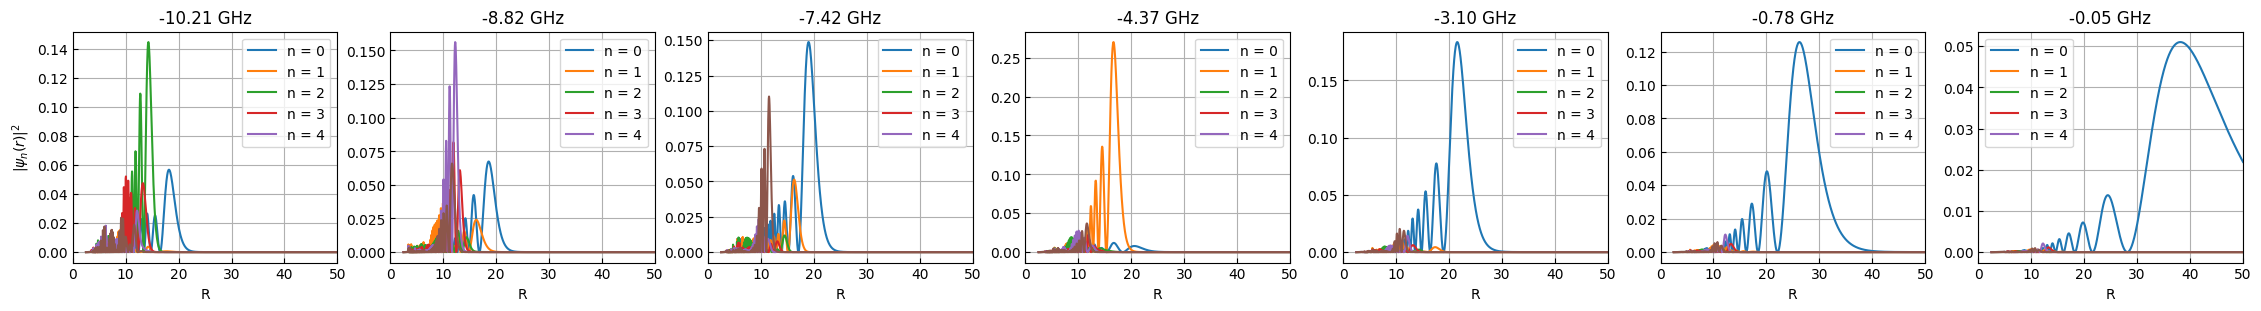

In [ ]:
wave_function_triplet_scaled = parse_wavefunction_file(f"{DATA_PATH}/wave_function_triplet_n_10_scaled_0.8141.output", 11, max_coeff=5)

fig, axes = utility.plot_many(1, len(wave_function_triplet_scaled), shape = (4 * len(wave_function_triplet_scaled), 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")
for i, (state, parsed) in enumerate(wave_function_triplet_scaled.items()):
    axes[i].plot(parsed["r"], parsed["coeffs"]**2)
    axes[i].set_xlabel("R")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 50)
    axes[i].legend([f"n = {j}" for j in range(5)])

fig.savefig(f"{SAVE_PATH}/wave_function_triplet_n_10_scaled_0,81.pdf", bbox_inches = "tight")

### triplet zoom on anisotropic scaling 0.6040

interactive(children=(IntSlider(value=0, description='scaling_index', max=49), Output()), _dom_classes=('widge…

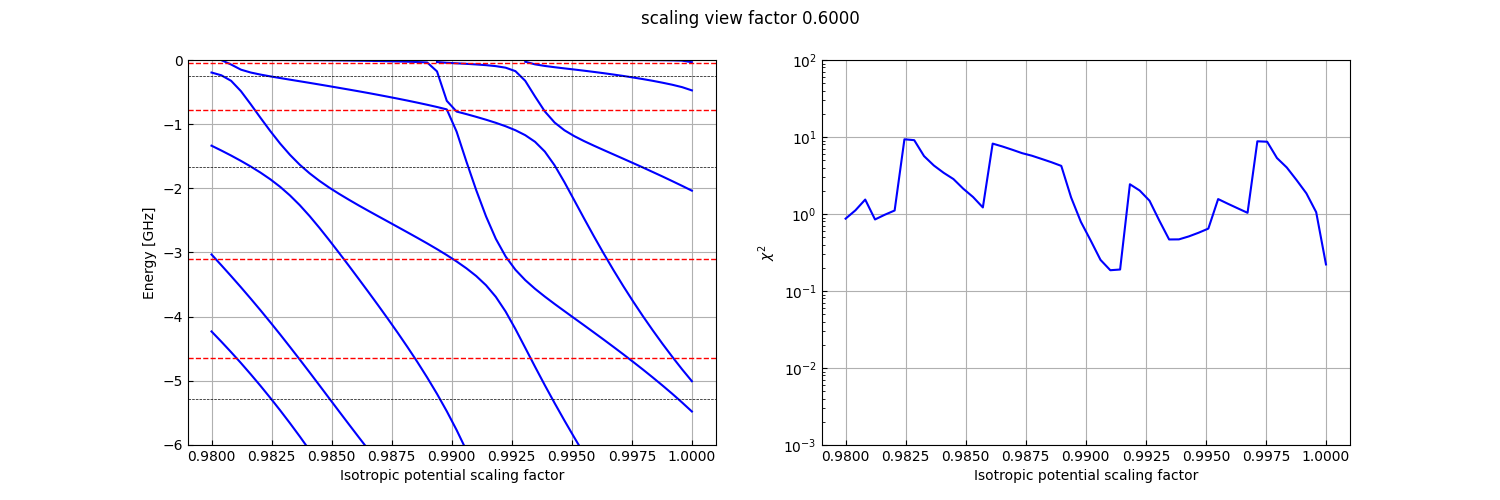

In [18]:
# triplet n = 10 2d scaling zoomed 0.6040
%matplotlib widget

bounds_triplet_2d_zoomed = BoundsDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_triplet_2d_scaling_isotropic_anisotropic_n_max_10_zoomed_0.6040.json")

fig, axes = plot_2d(bounds_triplet_2d_zoomed, reference_triplet_scaled_1)

label = "Isotropic potential scaling factor"

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel(label)
axes[0].set_ylim(-6, 0)

axes[1].set_yscale("log")
axes[1].set_ylim(1e-3, 1e2)
axes[1].set_ylabel(r"$\chi^2$")
axes[1].set_xlabel(label);

anisotropic scaling 0.6040816326530613
isotropic scaling 0.99125


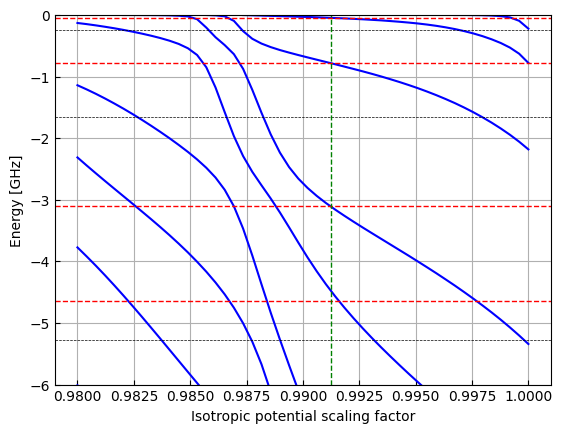

In [77]:
%matplotlib inline

bounds, scaling_aniso = bounds_triplet_2d_zoomed.slice(20)
scaling_iso = 0.99125
print("anisotropic scaling", scaling_aniso)
print("isotropic scaling", scaling_iso)

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference_triplet_scaled_1:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.axvline(scaling_iso, color = "green", linestyle="--", linewidth=1)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(f"Isotropic potential scaling factor")
ax.set_ylim(-6, 0);

fig.savefig(f"{SAVE_PATH}/bounds_triplet_n_10_scaled_0,60.pdf", bbox_inches = "tight")

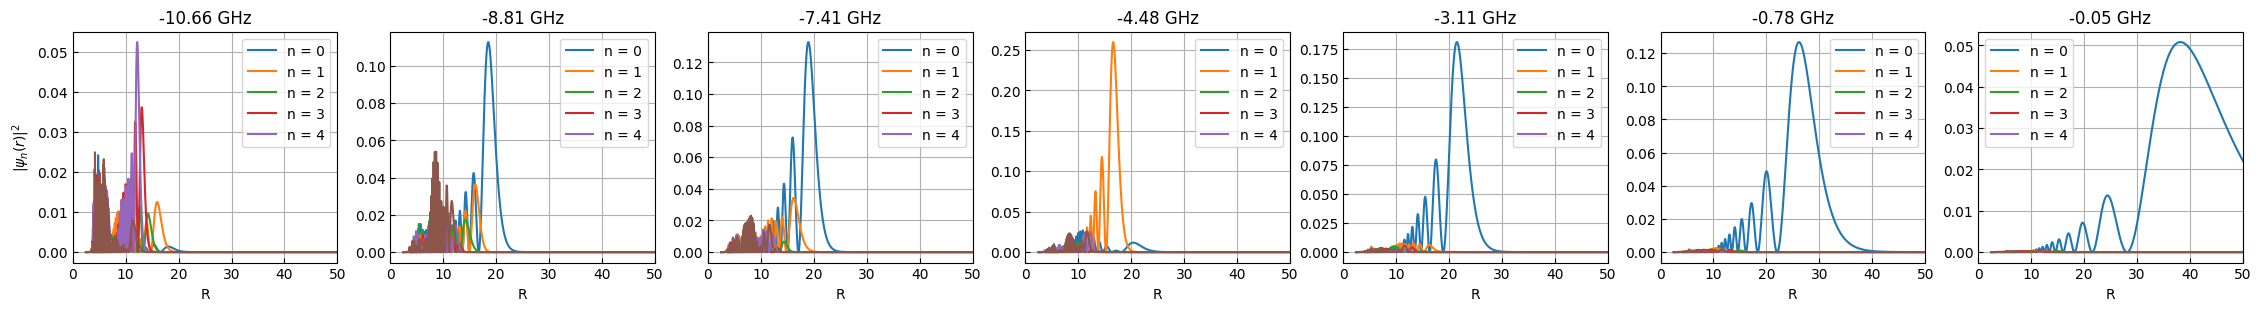

In [ ]:
wave_function_triplet_scaled = parse_wavefunction_file(f"{DATA_PATH}/wave_function_triplet_n_10_scaled_0.6040.output", 11, max_coeff=5)

fig, axes = utility.plot_many(1, len(wave_function_triplet_scaled), shape = (4 * len(wave_function_triplet_scaled), 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")
for i, (state, parsed) in enumerate(wave_function_triplet_scaled.items()):
    axes[i].plot(parsed["r"], parsed["coeffs"]**2)
    axes[i].set_xlabel("R")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 50)
    axes[i].legend([f"n = {j}" for j in range(5)])
    
# fig.savefig(f"{SAVE_PATH}/wave_function_triplet_n_10_scaled_0,60.pdf", bbox_inches="tight")

### singlet zoom on anisotropic scaling

interactive(children=(IntSlider(value=0, description='scaling_index', max=49), Output()), _dom_classes=('widge…

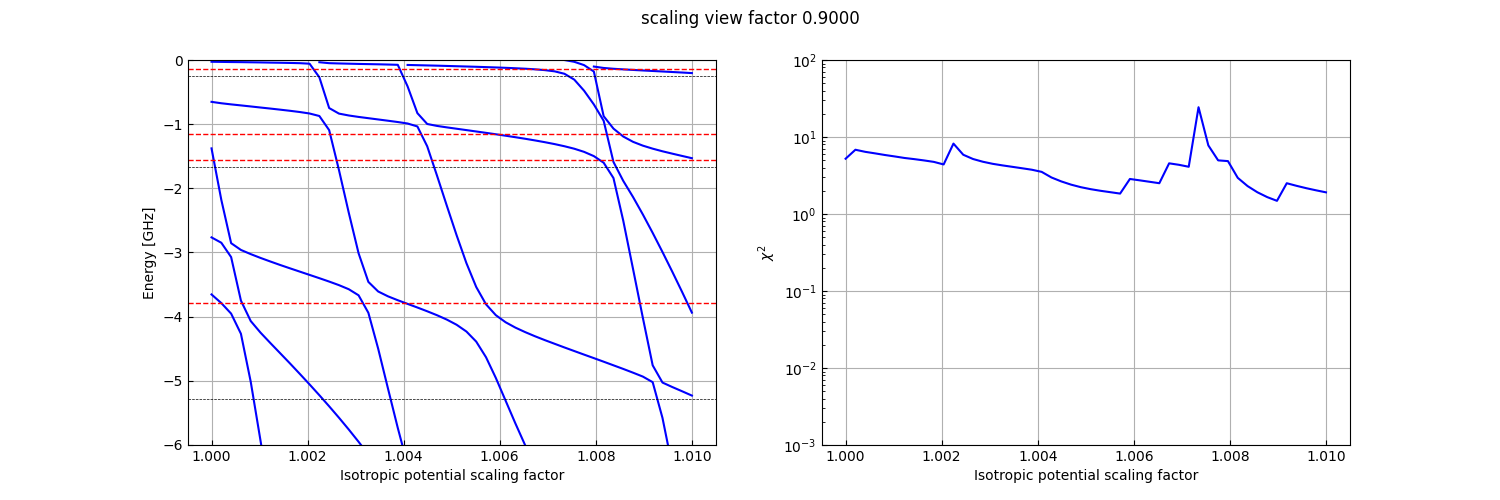

In [256]:
# triplet n = 10 2d scaling zoomed
%matplotlib widget

bounds_singlet_2d_zoomed = BoundsDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_2d_scaling_isotropic_anisotropic_n_max_10_zoomed_0,9111.json")
fig, axes = plot_2d(bounds_singlet_2d_zoomed, reference_singlet_scaled_1)

label = "Isotropic potential scaling factor"

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel(label)
axes[0].set_ylim(-6, 0)

axes[1].set_yscale("log")
axes[1].set_ylim(1e-3, 1e2)
axes[1].set_ylabel(r"$\chi^2$")
axes[1].set_xlabel(label);

anisotropic scaling 0.9138775510204082
isotropic scaling 1.00354


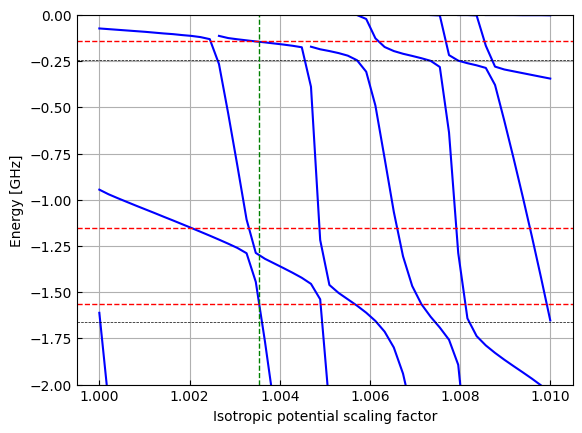

In [ ]:
%matplotlib inline

bounds, scaling_aniso = bounds_singlet_2d_zoomed.slice(34)
scaling_iso = 1.00354
print("anisotropic scaling", scaling_aniso)
print("isotropic scaling", scaling_iso)

fig, ax = utility.plot()
for state in bounds.states():
    ax.plot(state[:, 0], state[:, 1], color="blue")

for b in reference_singlet_scaled_1:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.axvline(scaling_iso, color = "green", linestyle="--", linewidth=1)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(f"Isotropic potential scaling factor")
ax.set_ylim(-2, 0);
# ax.set_ylim(-1.6, -1.5);

# fig.savefig(f"{SAVE_PATH}/bounds_singlet_n_10_scaled_0,86.pdf")

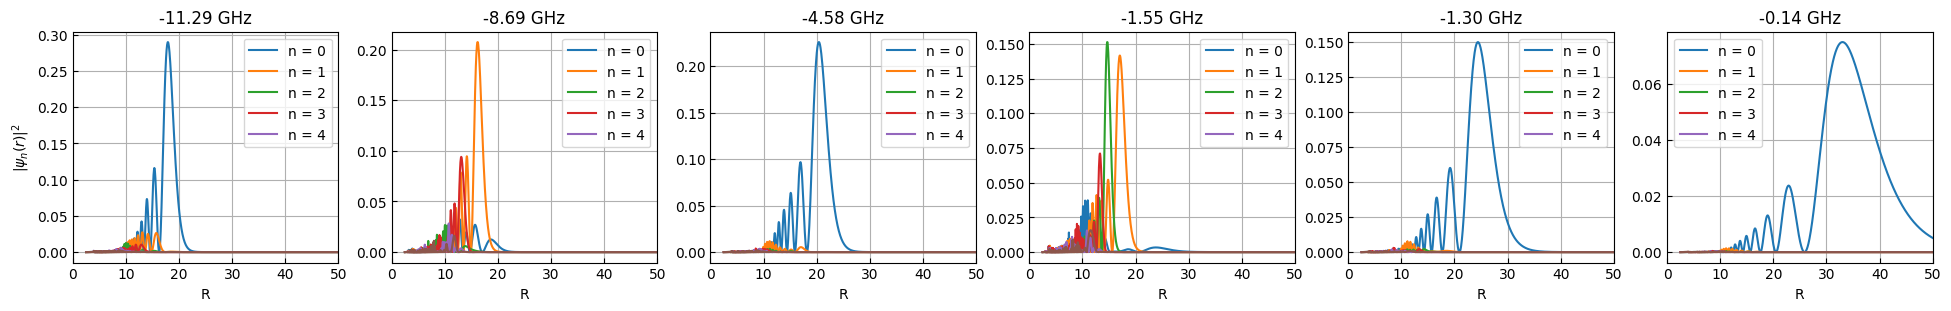

In [294]:
wave_function_singlet_scaled = parse_wavefunction_file(f"{DATA_PATH}/wave_function_singlet_n_10_scaled_0.9138.output", 11, max_coeff=5)

fig, axes = utility.plot_many(1, len(wave_function_singlet_scaled), shape = (4 * len(wave_function_singlet_scaled), 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")
for i, (state, parsed) in enumerate(wave_function_singlet_scaled.items()):
    axes[i].plot(parsed["r"], parsed["coeffs"]**2)
    axes[i].set_xlabel("R")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 50)
    axes[i].legend([f"n = {j}" for j in range(5)])
    
# fig.savefig(f"{SAVE_PATH}/wave_function_triplet_n_10_scaled_0,60.pdf", bbox_inches="tight")

### singlet zoom n = 20

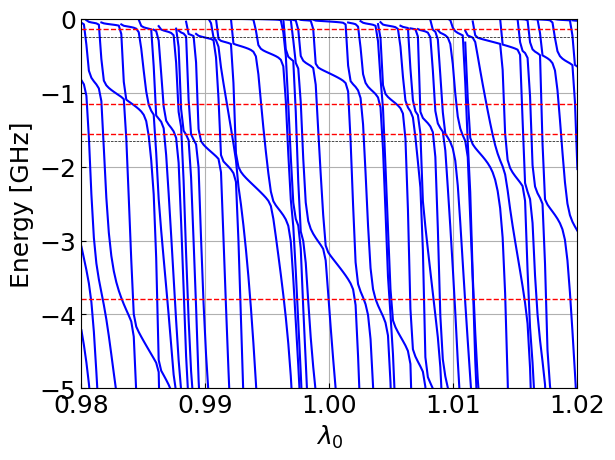

In [2]:
fig, ax = utility.plot()

bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_isotropic_n_max_20.json")
for state in bounds.states():
	ax.plot(state[:, 0], state[:, 1], color = "blue")
	
for b in reference_singlet_scaled_1:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(r"$\lambda_0$")
ax.set_ylim(-5, 0);
ax.set_xlim(0.98, 1.02);

### singlet zoom n = 30

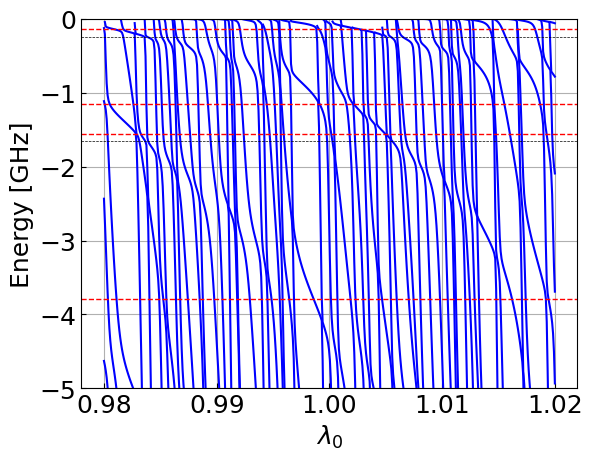

In [3]:
fig, ax = utility.plot()

bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_isotropic_n_max_30.json")
for state in bounds.states():
	ax.plot(state[:, 0], state[:, 1], color = "blue")
	
for b in reference_singlet_scaled_1:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(r"$\lambda_0$")
ax.set_ylim(-5, 0);
# ax.set_xlim(0.998, 1.002);

### singlet zoom n = 40

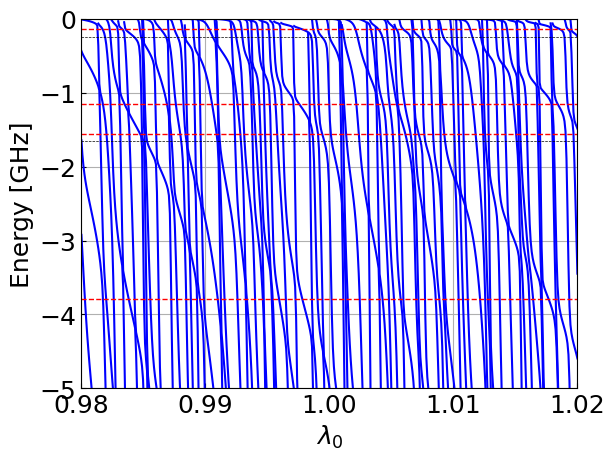

In [4]:
fig, ax = utility.plot()

bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_isotropic_n_max_40.json")
for state in bounds.states():
	ax.plot(state[:, 0], state[:, 1], color = "blue")
	
for b in reference_singlet_scaled_1:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(r"$\lambda_0$")
ax.set_ylim(-5, 0);
ax.set_xlim(0.98, 1.02);

### singlet zoom n = 50

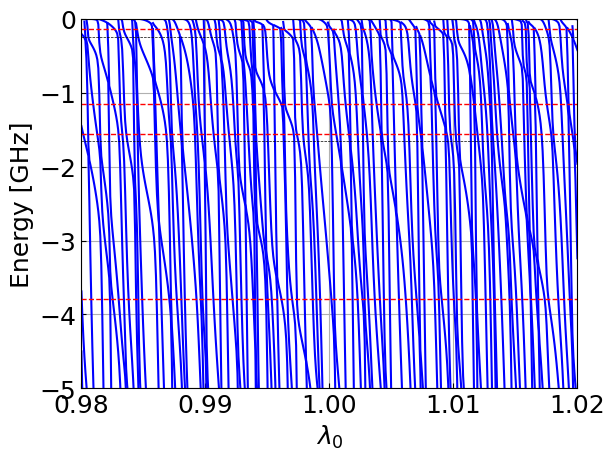

In [5]:
fig, ax = utility.plot()

bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bounds_singlet_scaling_isotropic_n_max_50.json")
for state in bounds.states():
	ax.plot(state[:, 0], state[:, 1], color = "blue")
	
for b in reference_singlet_scaled_1:
    ax.axhline(b, color = "red", linestyle="--", linewidth=1)

for b in BINS:
    ax.axhline(b, color = "black", linestyle="--", linewidth=0.5)

ax.set_ylabel(f"Energy [GHz]")
ax.set_xlabel(r"$\lambda_0$")
ax.set_ylim(-5, 0);
ax.set_xlim(0.98, 1.02);

# 2d automatic optimization

## Triplet

best scalings: [1.0069487290287622, 0.8152177020075073] \
scaling types: [Isotropic, Anisotropic] \
chi2: 0.00009961025610484435

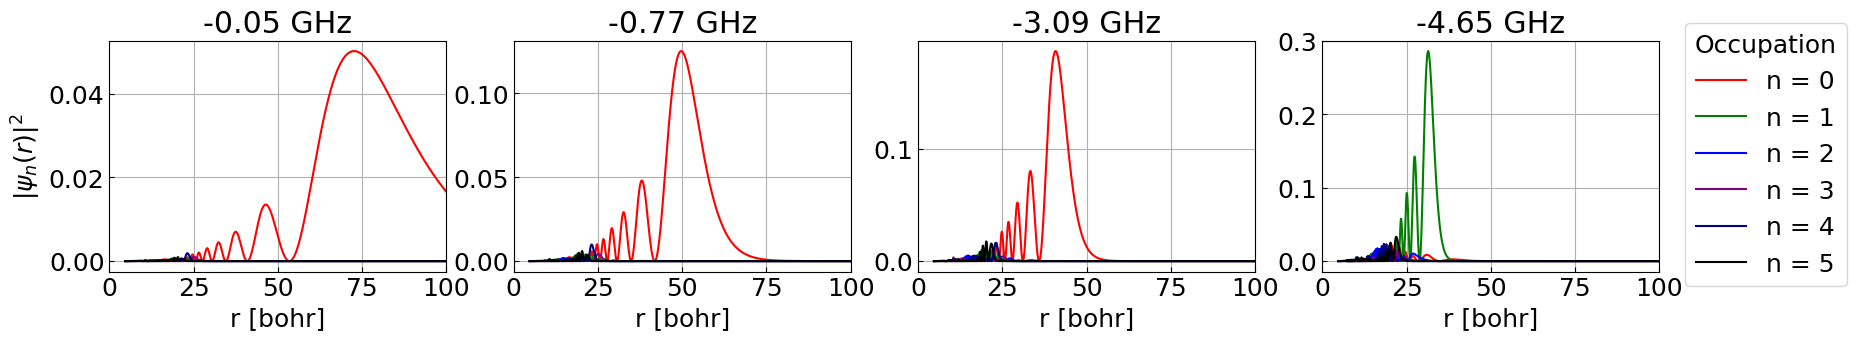

In [ ]:
wave_function_triplet_scaled = parse_wavefunction_file(f"{DATA_PATH}/bound_wave_triplet_n_10_scaled_1.007_v2.output", 11, max_coeff=5)

take = 4

fig, axes = utility.plot_many(1, take, shape = (5 * take, 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in itertools.islice(enumerate(reversed(wave_function_triplet_scaled.items())), take):
    for j in range(parsed["coeffs"].shape[1]):
        axes[i].plot(parsed["r"] * ANGS, parsed["coeffs"][:, j] **2, color = colors[j])
    axes[i].set_xlabel("r [bohr]")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 100)

fig.legend([f"n = {j}" for j in range(max_coeff + 1)],
           loc='center right', bbox_to_anchor=(1, 0.5),
           title='Occupation');

# fig.savefig(f"{SAVE_PATH}/wave_function_triplet_scaled_n_10.pdf", bbox_inches = "tight")

## Singlet

best scalings: [1.0036204085226377, 0.9129498323277407] \
scaling types: [Isotropic, Anisotropic] \
chi2: 0.0000000000000001

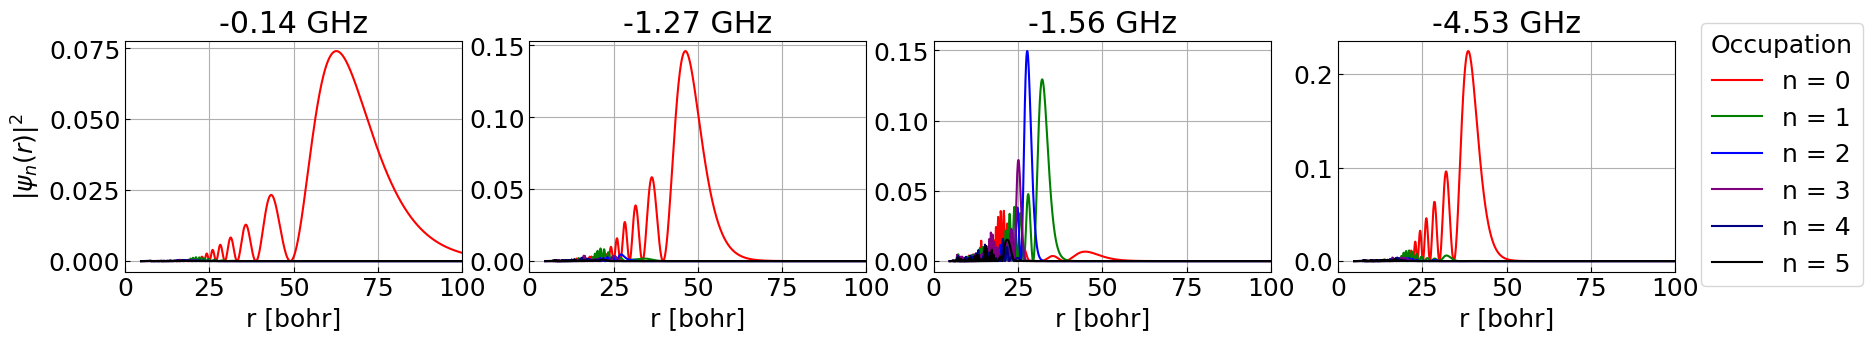

In [ ]:
wave_function_singlet_scaled = parse_wavefunction_file(f"{DATA_PATH}/bound_wave_singlet_n_10_scaled_1.0036_v2.output", 11, max_coeff=5)

take = 4

fig, axes = utility.plot_many(1, take, shape = (5 * take, 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")

for i, (state, parsed) in itertools.islice(enumerate(reversed(wave_function_singlet_scaled.items())), take):
    for j in range(parsed["coeffs"].shape[1]):
        axes[i].plot(parsed["r"] * ANGS, parsed["coeffs"][:, j] **2, color = colors[j])
    axes[i].set_xlabel("r [bohr]")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 100)

fig.legend([f"n = {j}" for j in range(max_coeff + 1)],
           loc='center right', bbox_to_anchor=(1, 0.5),
           title='Occupation');

# fig.savefig(f"{SAVE_PATH}/wave_function_singlet_scaled_n_10.pdf", bbox_inches = "tight")

best scalings: [1.1786703389130213, 0.828444798334072] \
scaling types: [Isotropic, Anisotropic] \
chi2: 0.000000006844851167054217

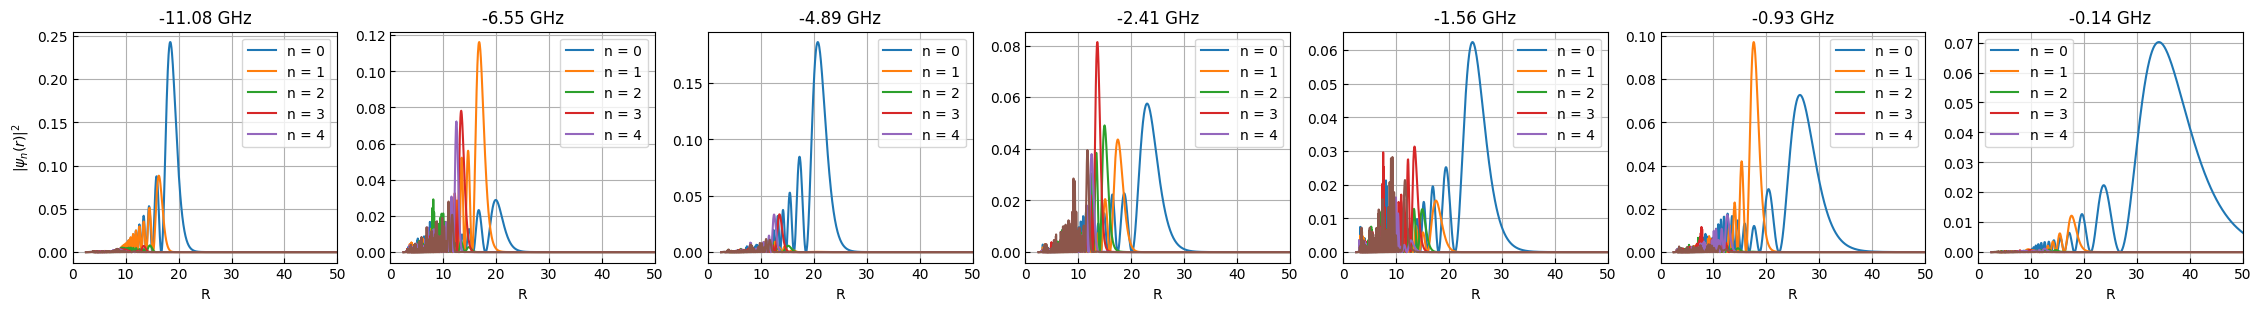

In [9]:
wave_function_singlet_scaled = parse_wavefunction_file(f"{DATA_PATH}/bound_wave_singlet_n_10_scaled_1.179_v2.output", 11, max_coeff=5)

fig, axes = utility.plot_many(1, len(wave_function_singlet_scaled), shape = (4 * len(wave_function_singlet_scaled), 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")
for i, (state, parsed) in enumerate(wave_function_singlet_scaled.items()):
    axes[i].plot(parsed["r"], parsed["coeffs"]**2)
    axes[i].set_xlabel("R")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 50)
    axes[i].legend([f"n = {j}" for j in range(5)])

n = 20 \
best scalings: [1.0071056889614176, 0.9986702538197931] \
scaling types: [Isotropic, Anisotropic] \
chi2: 0.001049347212655532

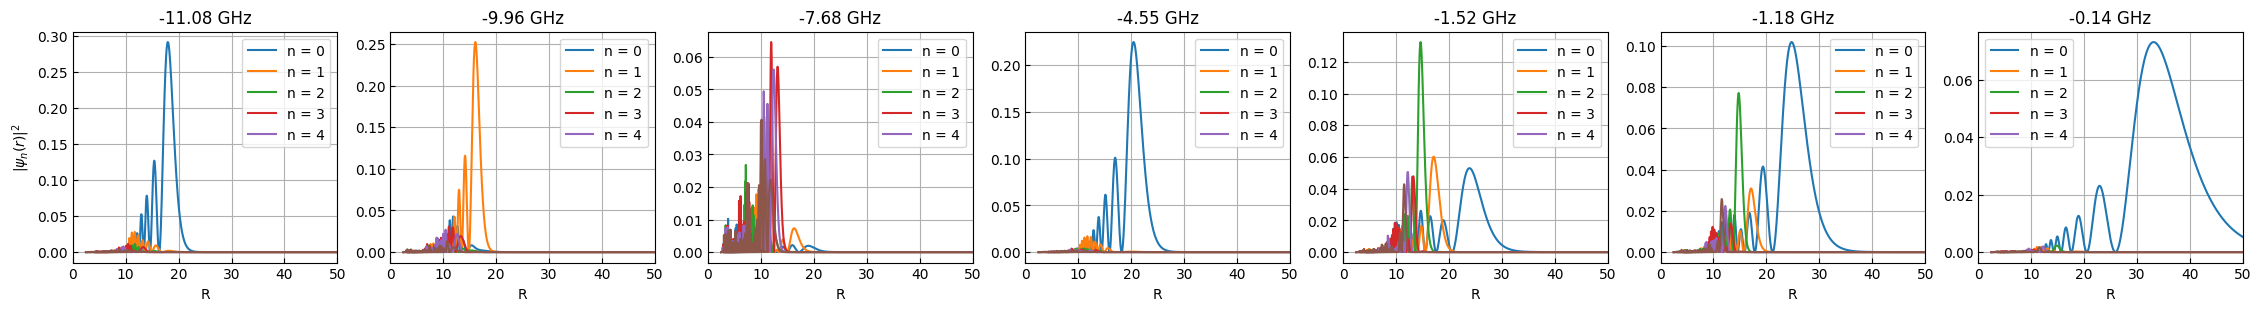

In [6]:
wave_function_singlet_scaled = parse_wavefunction_file(f"{DATA_PATH}/bound_wave_singlet_n_20_scaled_1.007.output", 21, max_coeff=5)

fig, axes = utility.plot_many(1, len(wave_function_singlet_scaled), shape = (4 * len(wave_function_singlet_scaled), 3))
axes[0].set_ylabel(r"$|\psi_n(r)|^2$")
for i, (state, parsed) in enumerate(wave_function_singlet_scaled.items()):
    axes[i].plot(parsed["r"], parsed["coeffs"]**2)
    axes[i].set_xlabel("R")
    axes[i].set_title(f"{parsed["energy"]:.2f} GHz")
    axes[i].set_xlim(0, 50)
    axes[i].legend([f"n = {j}" for j in range(5)])

n = 20 \
best scalings: [0.9860796296345176, 0.998197364397101] \
scaling types: [Isotropic, Anisotropic] \
chi2: 0.004416432394137659

n = 30 \
best scalings: [0.9990381814715135, 1.000280543454258] \
scaling types: [Isotropic, Anisotropic] \
chi2: 0.00013516340779987993

# Reconstructions

## Scaled

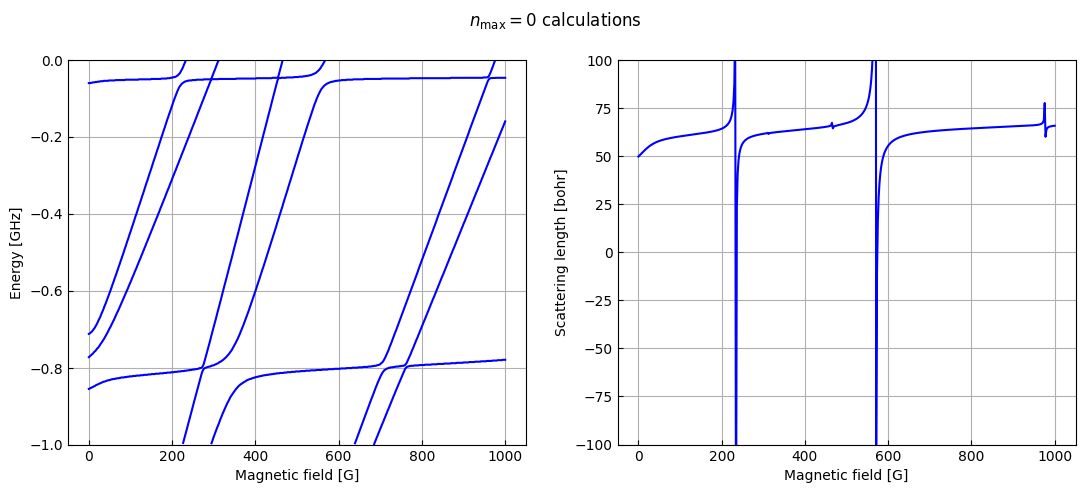

In [ ]:
fig, axes = utility.plot_many(1, 2, shape=(13, 5))

bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bound_states_n_max_0_scaled.json")
for state in bounds.states():
	axes[0].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-1, 0);

scatterings = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scattering_n_max_0_scaled.json")

axes[1].plot(scatterings.parameters, scatterings.s_lengths().real, color = "blue")

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-100, 100);

# fig.savefig(f"{SAVE_PATH}/feshbach_n_0_scaled.pdf", bbox_inches = "tight")
fig.suptitle(r"$n_\text{max} = 0$ calculations");

In [8]:
from ipywidgets import interact

bound_dependence = BoundsDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_bound_states_n_max_0_singlet_scaling_full.json")
scatterings_dependence = ScatteringDependence2D.parse_json(f"{DATA_PATH}/SrF_Rb_scatterings_n_max_0_singlet_scaling_full.json")

interactive(children=(IntSlider(value=0, description='scaling_index', max=49), Output()), _dom_classes=('widge…

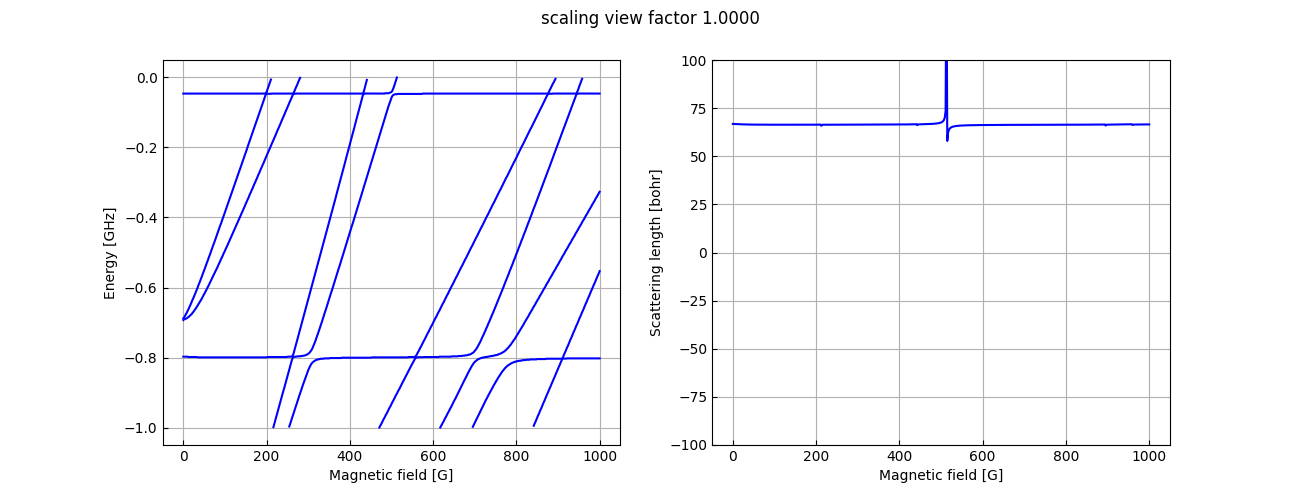

In [21]:
# singlet n = 0 2d scaling bound
%matplotlib widget

fig, axes = utility.plot_many(1, 2, shape=(13, 5))

bounds_init, scaling_view = bound_dependence.slice(0, 0)
for state in bounds_init.states():
    axes[0].plot(state[:, 0], state[:, 1], color="blue")

scattering_dependence, _ = scatterings_dependence.slice(0, 0)
axes[1].plot(scattering_dependence.parameters, scattering_dependence.s_lengths().real, color = "blue")
    
fig.suptitle(f"scaling view factor {scaling_view:.4f}")

def update(scaling_index = 0):
    for art in list(axes[0].lines):
        art.remove()

    bounds_index, scaling_view = bound_dependence.slice(scaling_index, 0)
    for state in bounds_index.states():
        axes[0].plot(state[:, 0], state[:, 1], color="blue")

    for art in list(axes[1].lines):
        art.remove()

    scattering_dependence, _ = scatterings_dependence.slice(scaling_index, 0)
    axes[1].plot(scattering_dependence.parameters, scattering_dependence.s_lengths().real, color = "blue")

    fig.suptitle(f"scaling view factor {scaling_view:.4f}")

    fig.canvas.draw_idle()

interact(update, scaling_index = (0, bound_dependence.slice_len(0) - 1))

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]");

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-100, 100);

scaling singlet 1.0146938775510204


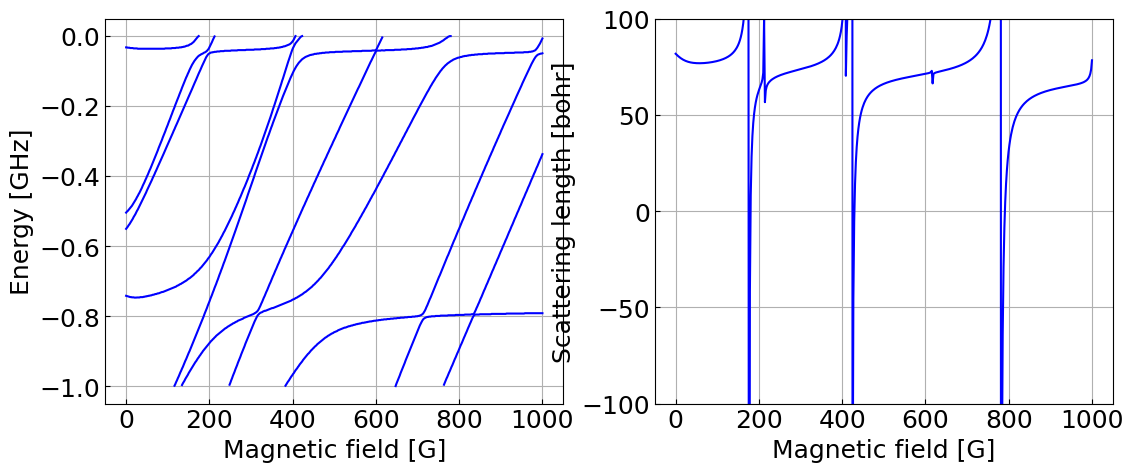

In [ ]:
%matplotlib inline

index = 36

bounds, scale = bound_dependence.slice(index, 0)
scattering_dependence, _ = scatterings_dependence.slice(index, 0)

print("scaling singlet", scale)

fig, axes = utility.plot_many(1, 2, shape = (13, 5))
for state in bounds.states():
    axes[0].plot(state[:, 0], state[:, 1], color="blue")
    
axes[1].plot(scattering_dependence.parameters, scattering_dependence.s_lengths().real, color = "blue")

axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]");

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-100, 100);

# fig.savefig(f"{SAVE_PATH}/feshbach_n_0_scaled_fit.pdf", bbox_inches = "tight")

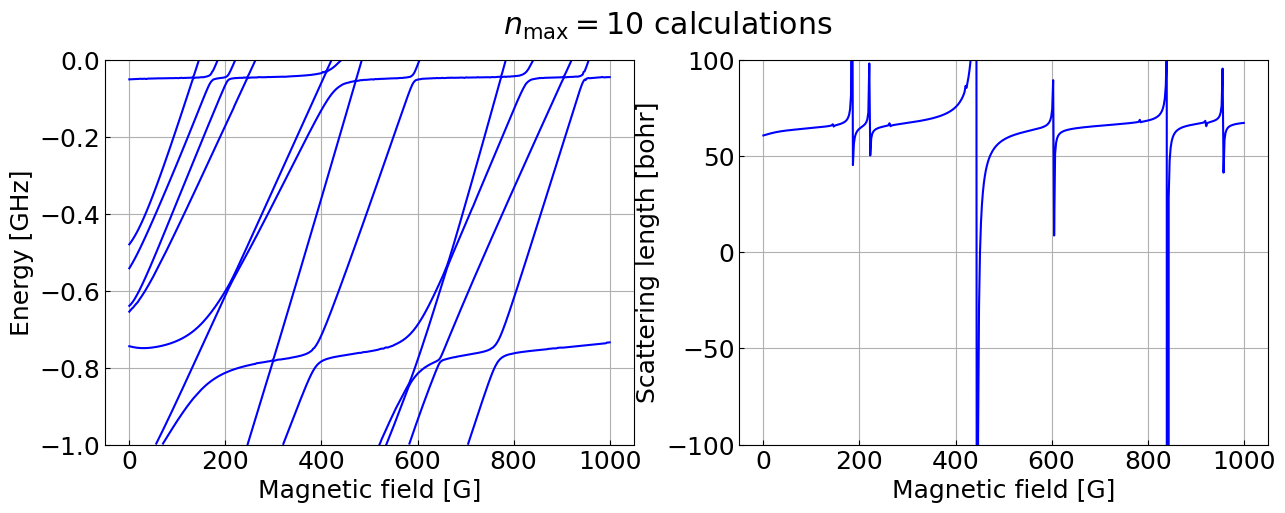

In [ ]:
fig, axes = utility.plot_many(1, 2, shape=(15, 5))

bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bound_states_n_max_10_scaled_v0.json")
for state in bounds.states():
	axes[0].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-1, 0);

scatterings = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scattering_n_max_10_scaled_v0.json")

axes[1].plot(scatterings.parameters, scatterings.s_lengths().real, color = "blue")

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-100, 100);

# fig.savefig(f"{SAVE_PATH}/feshbach_n_10_scaled_v0.pdf", bbox_inches = "tight")
fig.suptitle(r"$n_\text{max} = 10$ calculations");

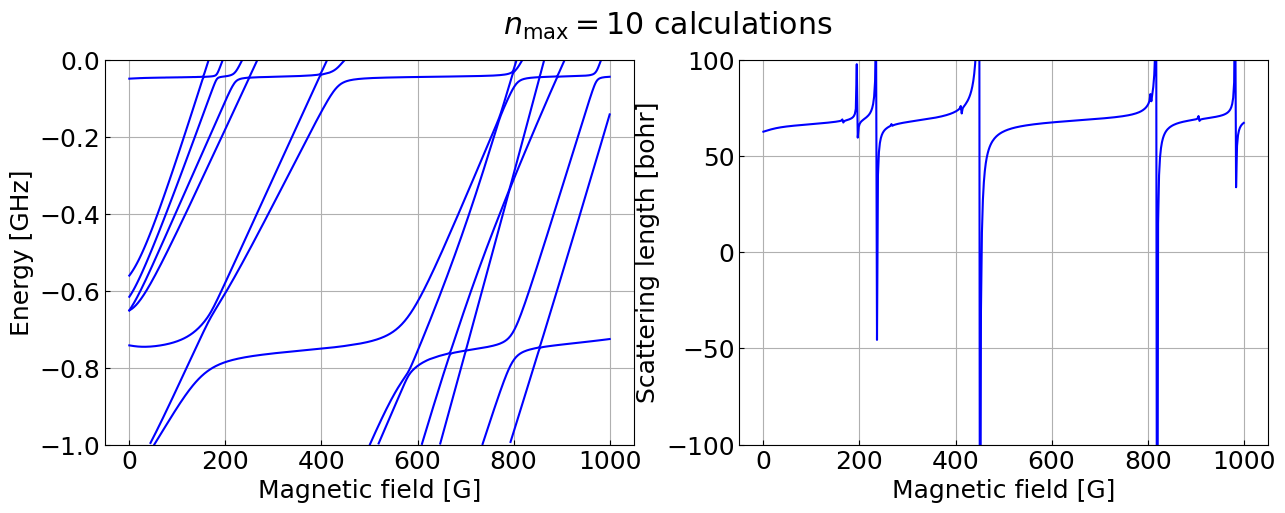

In [ ]:
fig, axes = utility.plot_many(1, 2, shape=(15, 5))

bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bound_states_n_max_10_scaled_v1.json")
for state in bounds.states():
	axes[0].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-1, 0);

scatterings = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scattering_n_max_10_scaled_v1.json")

axes[1].plot(scatterings.parameters, scatterings.s_lengths().real, color = "blue")

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-100, 100);

# fig.savefig(f"{SAVE_PATH}/feshbach_n_10_scaled_v1.pdf", bbox_inches = "tight")
fig.suptitle(r"$n_\text{max} = 10$ calculations");

## Unscaled

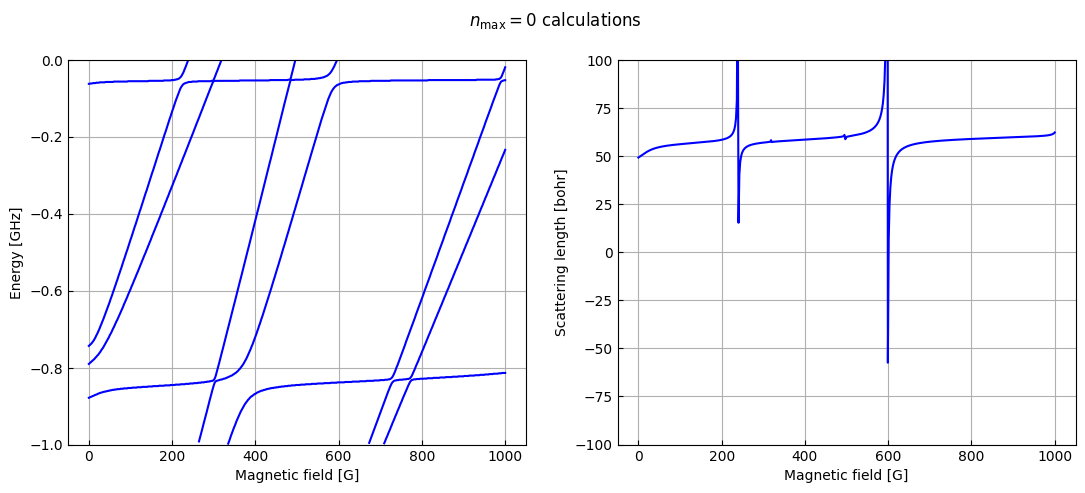

In [6]:
fig, axes = utility.plot_many(1, 2, shape=(13, 5))

bounds = BoundsDependence.parse_json(f"{DATA_PATH}/SrF_Rb_bound_states_n_max_0_unscaled.json")
for state in bounds.states():
	axes[0].plot(state[:, 0], state[:, 1], color = "blue")
	
axes[0].set_ylabel(f"Energy [GHz]")
axes[0].set_xlabel("Magnetic field [G]")
axes[0].set_ylim(-1, 0);

scatterings = ScatteringDependence.parse_json(f"{DATA_PATH}/SrF_Rb_scattering_n_max_0_unscaled.json")

axes[1].plot(scatterings.parameters, scatterings.s_lengths().real, color = "blue")

axes[1].set_ylabel(f"Scattering length [bohr]")
axes[1].set_xlabel("Magnetic field [G]")
axes[1].set_ylim(-100, 100);

# fig.savefig(f"{SAVE_PATH}/feshbach_n_0.pdf", bbox_inches = "tight")
fig.suptitle(r"$n_\text{max} = 0$ calculations");